<IPython.core.display.Javascript object>


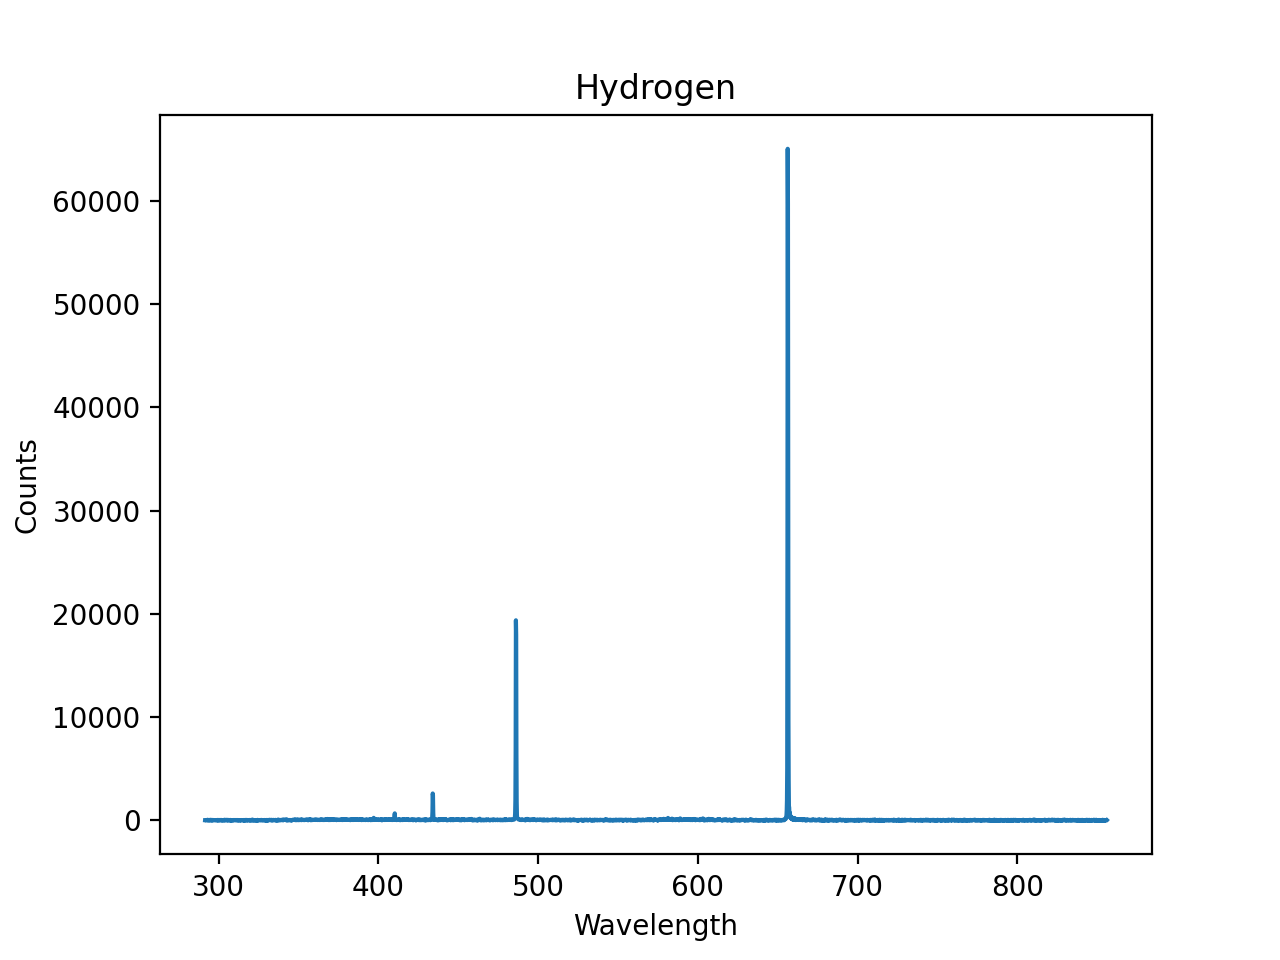

<IPython.core.display.Javascript object>


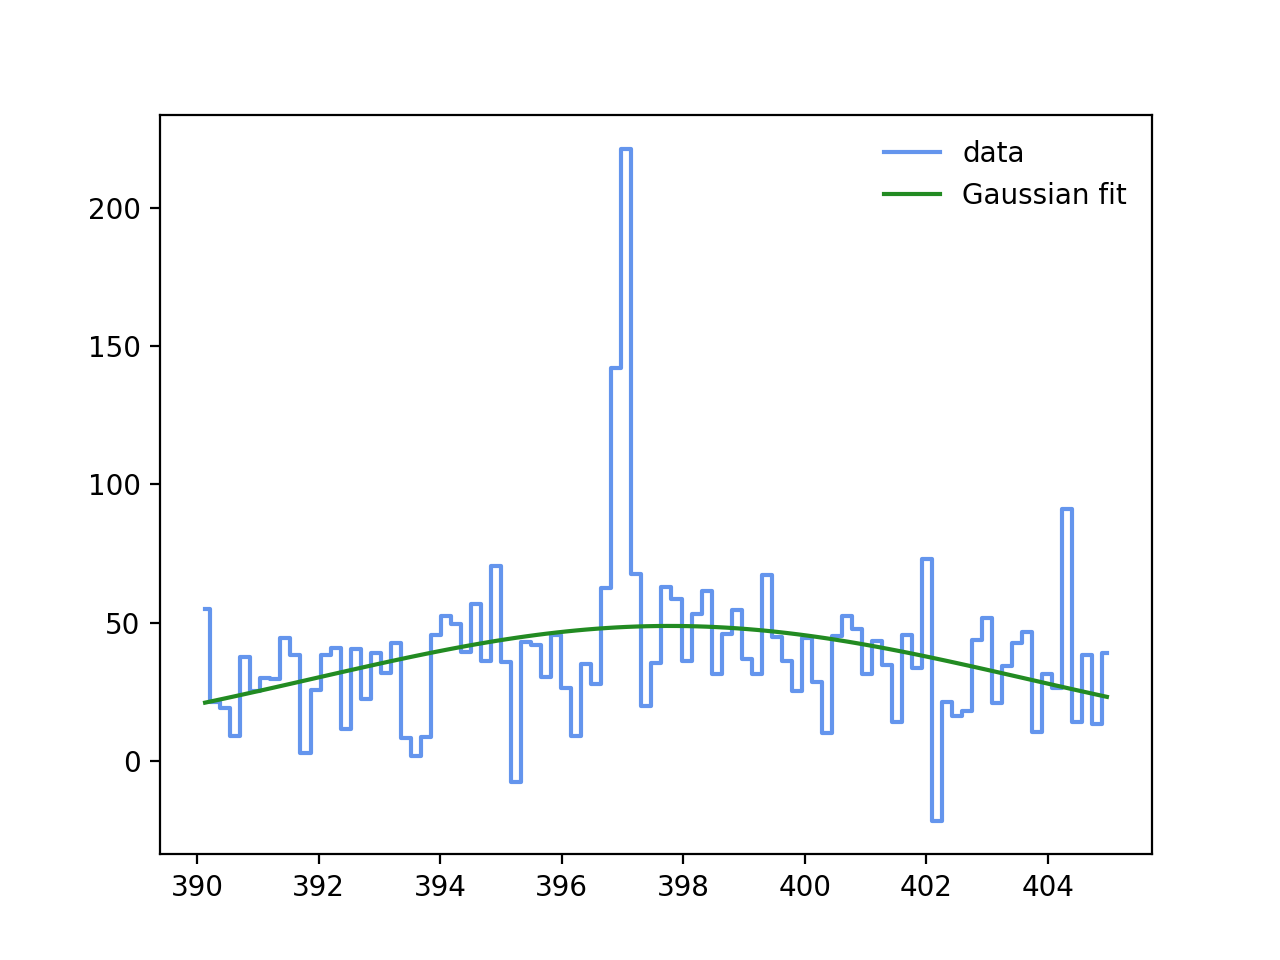

Estimated parameters:
 A = 48.77624, mu = 397.77253,  sigma = 5.88861 

Uncertainties in the estimated parameters: 
 σ²(A) = 24.31701, σ²(mu) = 0.57282, σ²(sigma) = 1.30073 

Covariance matrix: 
 [[24.31701389 -0.10255799 -3.73508783]
 [-0.10255799  0.57282194  0.0537927 ]
 [-3.73508783  0.0537927   1.30072579]]


<IPython.core.display.Javascript object>


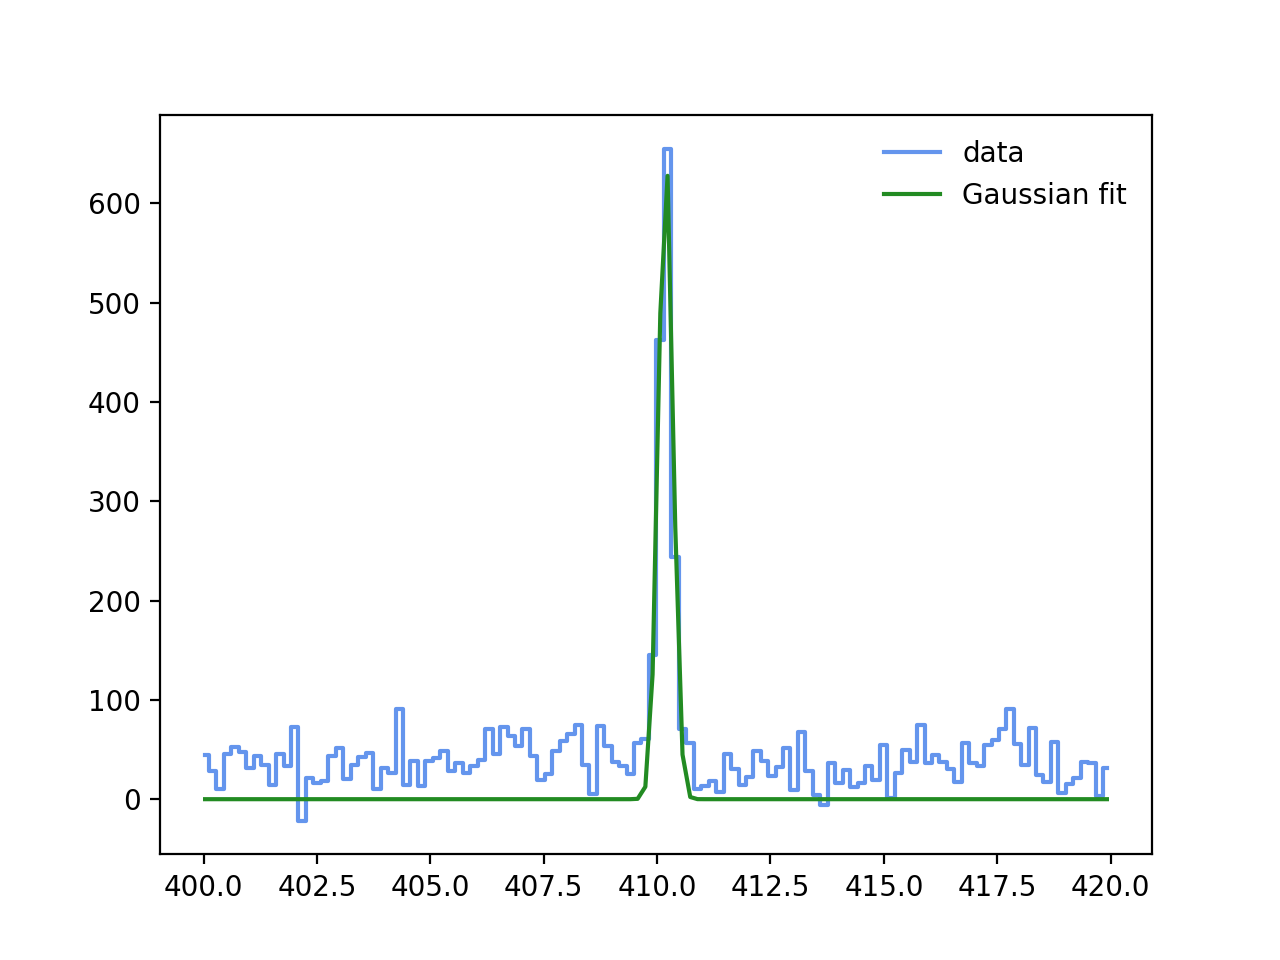

Estimated parameters:
 A = 647.54407, mu = 410.18995,  sigma = 0.16016 

Uncertainties in the estimated parameters: 
 σ²(A) = 1489.31362, σ²(mu) = 0.00013, σ²(sigma) = 0.00012 

Covariance matrix: 
 [[ 1.48931362e+03  8.83146572e-03 -2.41556659e-01]
 [ 8.83146572e-03  1.28298834e-04 -2.07791242e-06]
 [-2.41556659e-01 -2.07791242e-06  1.23266094e-04]]


<IPython.core.display.Javascript object>


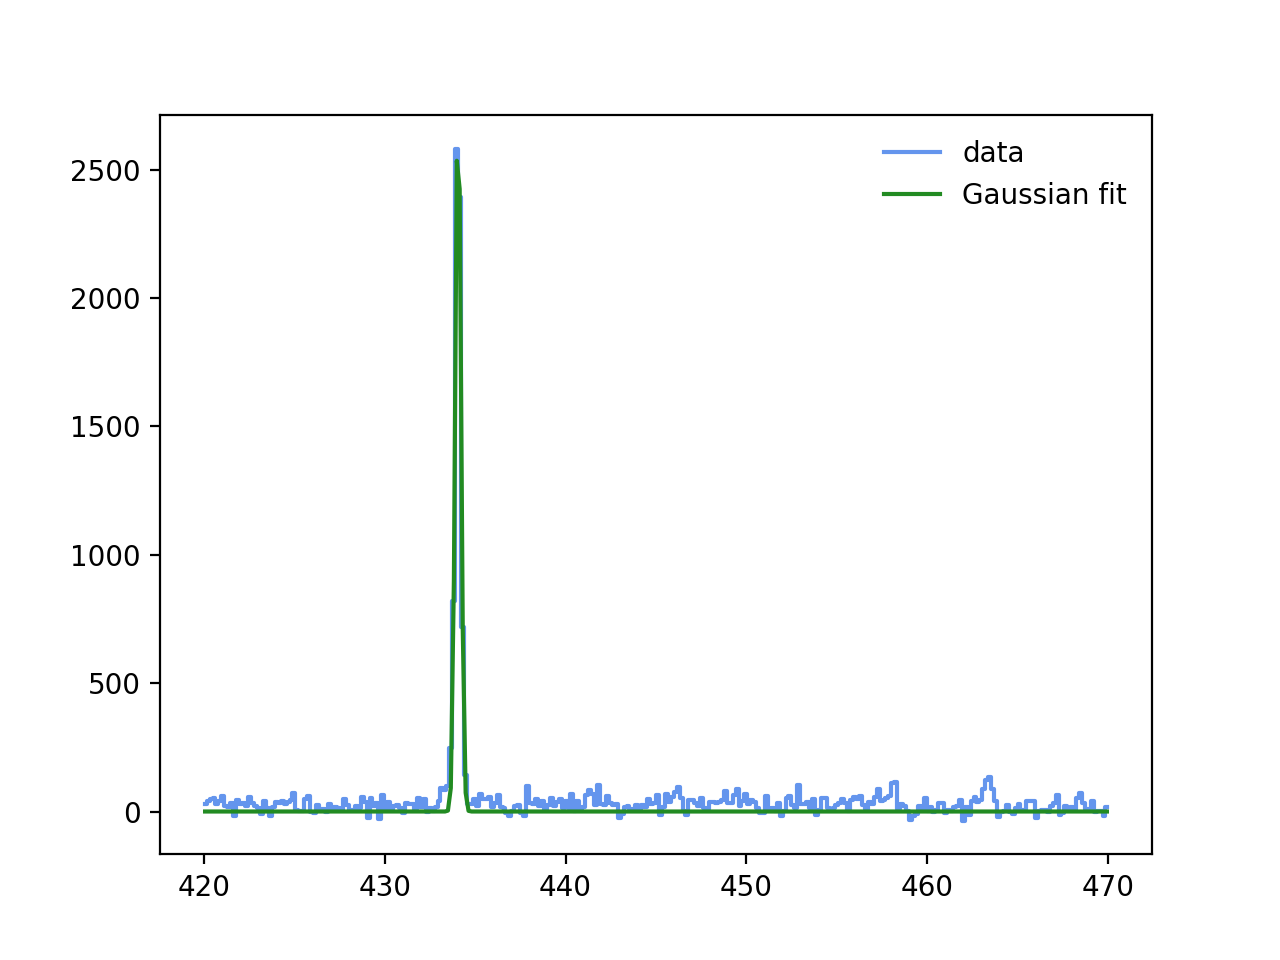

Estimated parameters:
 A = 2840.59929, mu = 434.06343,  sigma = 0.15392 

Uncertainties in the estimated parameters: 
 σ²(A) = 1527.29344, σ²(mu) = 0.00001, σ²(sigma) = 0.00001 

Covariance matrix: 
 [[ 1.52729344e+03  2.79009544e-04 -5.66074647e-02]
 [ 2.79009544e-04  6.09689854e-06  1.12865993e-07]
 [-5.66074647e-02  1.12865993e-07  6.26858879e-06]]


<IPython.core.display.Javascript object>


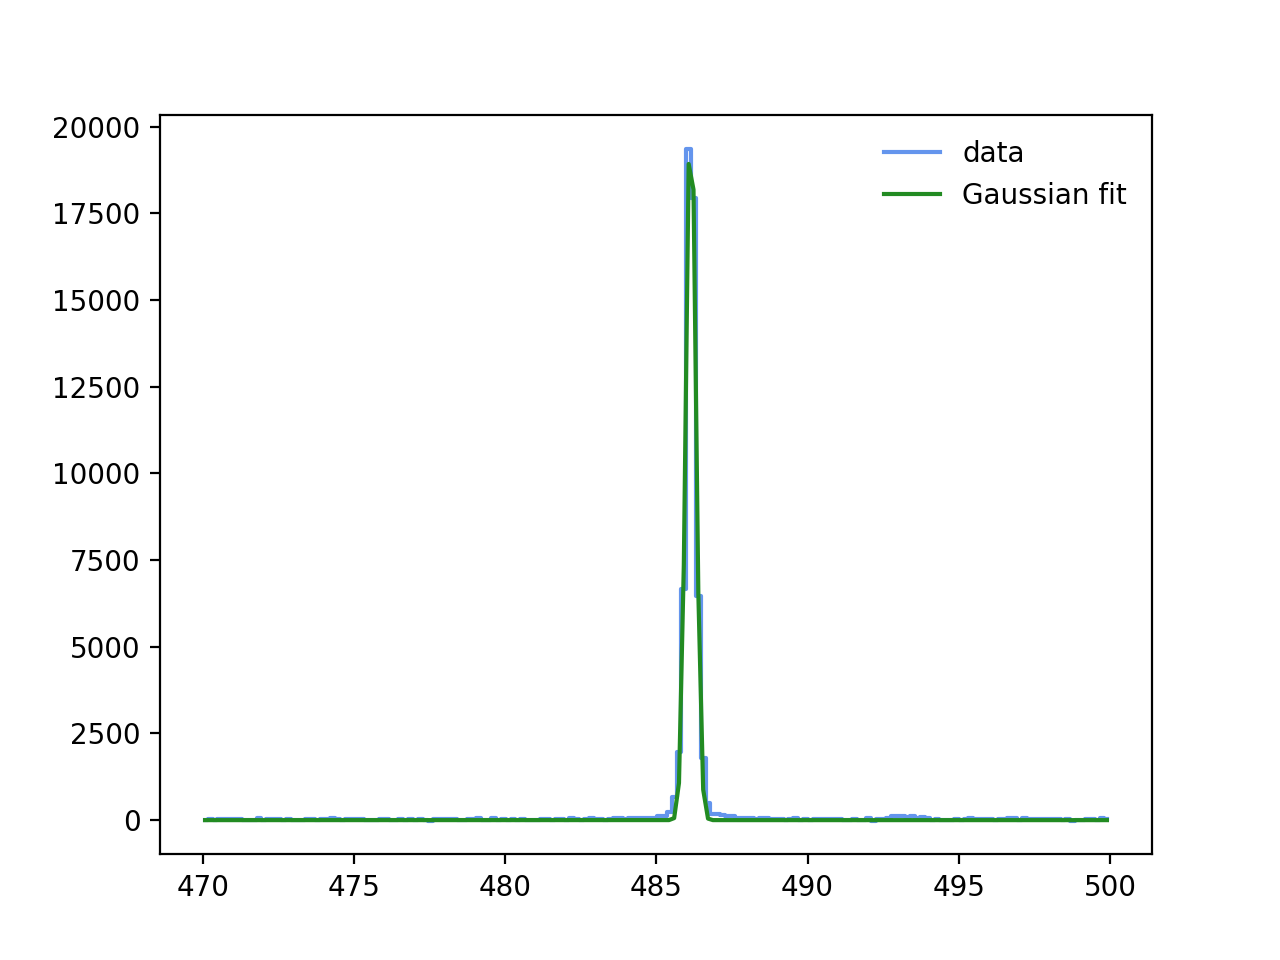

Estimated parameters:
 A = 20996.99978, mu = 486.14353,  sigma = 0.16134 

Uncertainties in the estimated parameters: 
 σ²(A) = 15345.92040, σ²(mu) = 0.00000, σ²(sigma) = 0.00000 

Covariance matrix: 
 [[1.53459204e+04 1.14429342e-04 7.93784408e-02]
 [1.14429342e-04 1.19908211e-06 1.56150468e-09]
 [7.93784408e-02 1.56150468e-09 1.21778964e-06]]


<IPython.core.display.Javascript object>


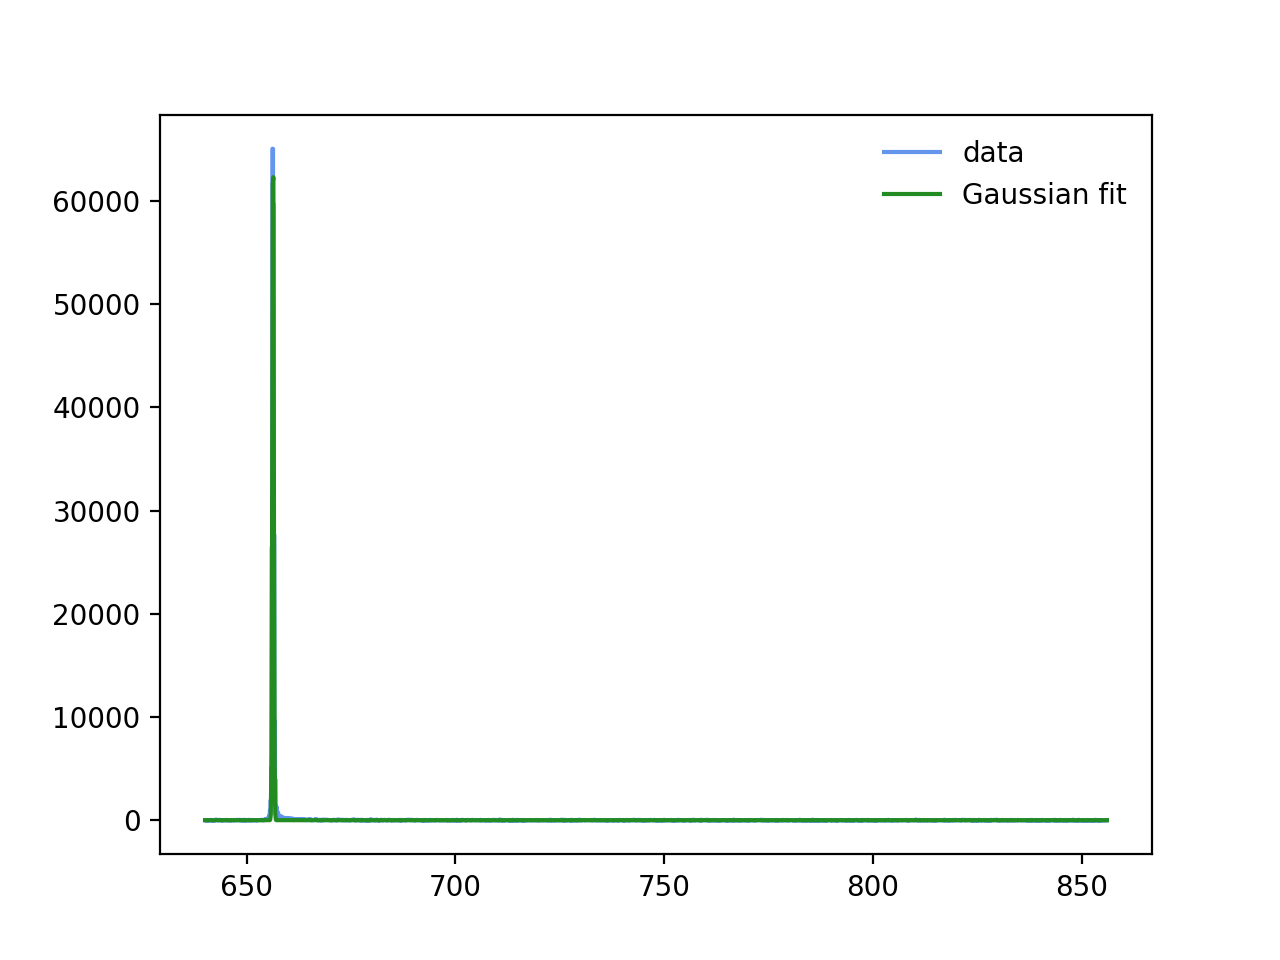

Estimated parameters:
 A = 68104.35418, mu = 656.29705,  sigma = 0.17289 

Uncertainties in the estimated parameters: 
 σ²(A) = 29161.59937, σ²(mu) = 0.00000, σ²(sigma) = 0.00000 

Covariance matrix: 
 [[ 2.91615994e+04  1.02639029e-03 -4.86489855e-02]
 [ 1.02639029e-03  2.57592904e-07  2.33446690e-09]
 [-4.86489855e-02  2.33446690e-09  2.50472331e-07]]


In [29]:
import sys, os

# Package that supports mathmatical operations on arrays
import numpy as np  

# Package that supports operations for data structures and numeric tables
import pandas as pd

# Package for plotting; 
# first line makes plots interactive, 
# second actually loads the library
%matplotlib notebook
import matplotlib.pyplot as plt

# Function that fits a curve to data 
from scipy.optimize import curve_fit

sys.path.append('./lib')
import fittingFunctions

# Specify the absolute path for the hydrogen spectrum inside quotation marks:
df = pd.read_csv("/Users/Yash/Downloads/FYSB 24/Spectro project data/Hydrogen unsaturated_1804350U2.txt", 
    sep=";",    # Here we specify that values are seperated by semicolons.
    header=6)   # This skips the first rows of the file containing information about the acquisiton settings
                 
    # Check if your spectrum txt file contains of 4 or 5 coulumns. If you have 5 coulumns use the adapted 'names'-array the line below.        
names=["Wavelength", "Count sample", "Background", "Reference"]
    # names=["Wavelength", "Count sample", "Background", "Reference", "Corrected for dark"])

df = df.stack().str.replace(',','.').unstack() # Turns the  ',' in the data frame to a point
data = df.to_numpy() #Converts the data frame into an Numpy array
wavelength = np.array(list(data[:, 0]), dtype=float) # Turns the Numpy 2d array with the wavelengths in a regular 2D float array
counts = np.array(list(data[:, 1]), dtype=float) # If you have saved 5 coulumns, use the 'Corrected for dark values' by changing the '1' to a '4'.

plt.figure()
plt.plot(wavelength, counts)
plt.show()
plt.title("Hydrogen")      # set title of the plot
plt.xlabel("Wavelength")   # set label for x-axis 
plt.ylabel("Counts")       # set label for Y-axis 

peak1 = fittingFunctions.perform_Gaussian_fit(x=wavelength, 
                                              y=counts,      
                                              region_start=390,   # bins where to start fitting
                                              region_stop=405,    # bins where to stop fitting
                                              mu_guess=396,       # guess for the position of peak centroid
                                              A_guess=200,       # guess for the amplitude of the peak
                                              sigma_guess=1) 

peak2 = fittingFunctions.perform_Gaussian_fit(x=wavelength, 
                                              y=counts,      
                                              region_start=400,   # bins where to start fitting
                                              region_stop=420,    # bins where to stop fitting
                                              mu_guess=410,       # guess for the position of peak centroid
                                              A_guess=1000,       # guess for the amplitude of the peak
                                              sigma_guess=1) 

peak3 = fittingFunctions.perform_Gaussian_fit(x=wavelength, 
                                              y=counts,      
                                              region_start=420,   # bins where to start fitting
                                              region_stop=470,    # bins where to stop fitting
                                              mu_guess=440,       # guess for the position of peak centroid
                                              A_guess=3000,       # guess for the amplitude of the peak
                                              sigma_guess=1) 

peak4 = fittingFunctions.perform_Gaussian_fit(x=wavelength, 
                                              y=counts,      
                                              region_start=470,   # bins where to start fitting
                                              region_stop=500,    # bins where to stop fitting
                                              mu_guess=485,       # guess for the position of peak centroid
                                              A_guess=20000,       # guess for the amplitude of the peak
                                              sigma_guess=1) 

peak5 = fittingFunctions.perform_Gaussian_fit(x=wavelength, 
                                              y=counts,      
                                              region_start=640,   # bins where to start fitting
                                              region_stop=6700,    # bins where to stop fitting
                                              mu_guess=655,       # guess for the position of peak centroid
                                              A_guess=65000,       # guess for the amplitude of the peak
                                              sigma_guess=1) 

In [27]:
import numpy as np

# Air wavelengths in nanometers
hydrogen_wavelength = np.array([397.77253, 410.18995, 434.06343, 486.14353, 656.29705])

# Known refractive index of air (example value, replace with actual value if known)
n_air = 1.00028  # Replace this with the actual refractive index for your wavelengths

# Convert air wavelengths to vacuum wavelengths
hydrogen_vac_wavelength = hydrogen_wavelength * n_air

# Print the results
print("Air Wavelengths (nm):", hydrogen_wavelength)
print("Vacuum Wavelengths (nm):", hydrogen_vac_wavelength)

Air Wavelengths (nm): [397.77253 410.18995 434.06343 486.14353 656.29705]
Vacuum Wavelengths (nm): [397.88390631 410.30480319 434.18496776 486.27965019 656.48081317]


In [28]:
import numpy as np

# Extracted wavelengths in nanometers (replace with your data)
hydrogen_wavelength = np.array([397.77253, 410.18995, 434.06343, 486.14353, 656.29705])

# Convert wavelengths to meters
lambda_m = hydrogen_wavelength * 1e-9

# Quantum numbers for the Balmer series (n1 = 2, n2 = 3, 4, 5, 6, 7)
n1 = 2
n2 = np.array([3, 4, 5, 6, 7])

# Calculate the Rydberg constant for each transition
R_H = 1 / (lambda_m * (1 / n1**2 - 1 / n2**2))

# Print the Rydberg constant for each transition
print("Rydberg constant for each transition (m^-1):", R_H)

# Calculate the average Rydberg constant
R_H_avg = np.mean(R_H)
print("Average Rydberg constant (m^-1):", R_H_avg)

# Compare with the accepted value (1.0973731568539e7 m^-1)
R_H_accepted = 1.0973731568539e7
print("Accepted Rydberg constant (m^-1):", R_H_accepted)
print("Percentage error:", abs((R_H_avg - R_H_accepted) / R_H_accepted * 100), "%")

Rydberg constant for each transition (m^-1): [18100797.45828602 13002106.30058911 10970527.42246626  9256525.53681009
  6636561.22719972]
Average Rydberg constant (m^-1): 11593303.589070238
Accepted Rydberg constant (m^-1): 10973731.568539
Percentage error: 5.645955677533731 %


<IPython.core.display.Javascript object>


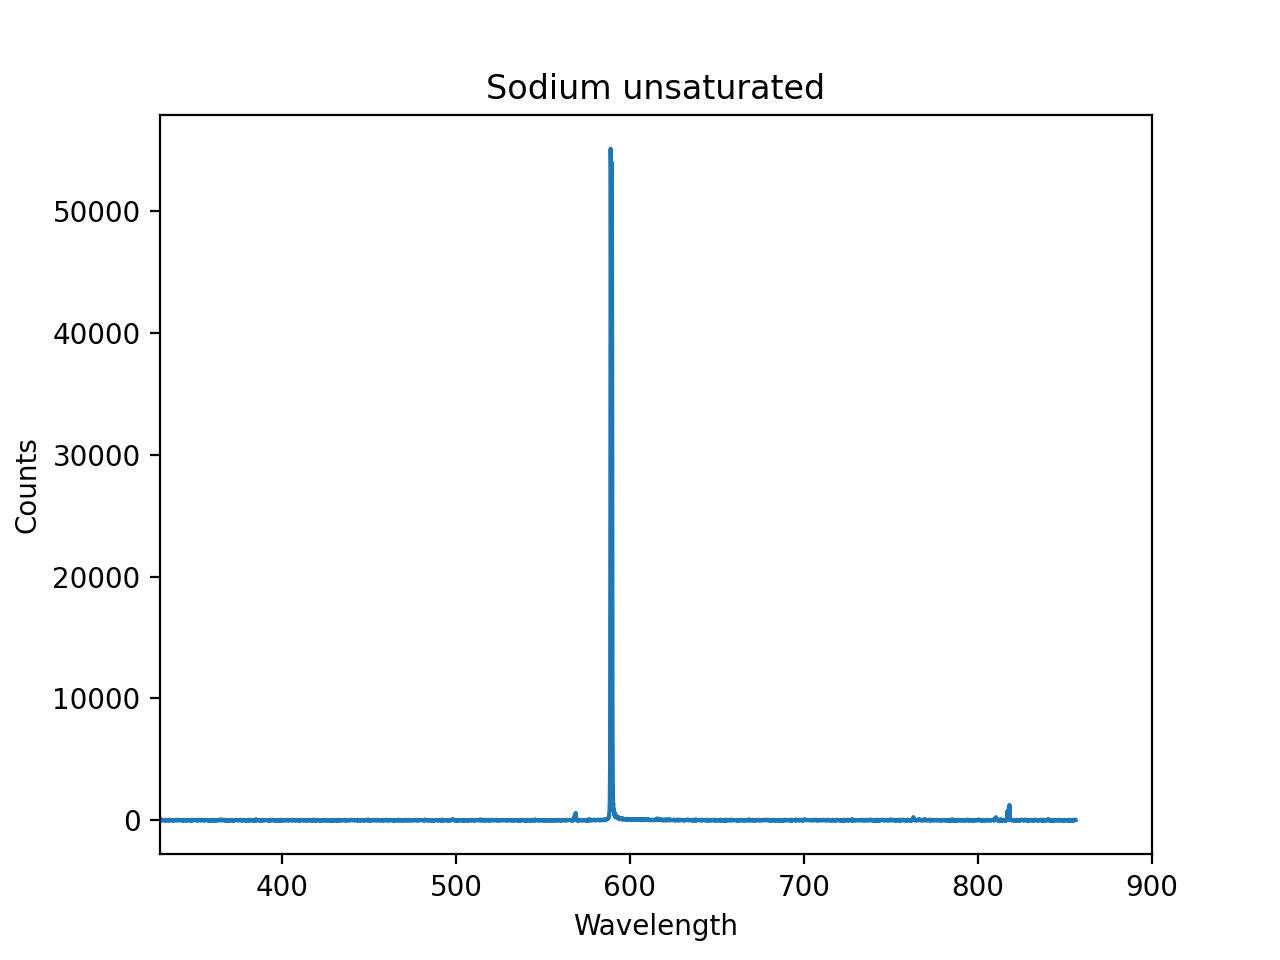

Text(0, 0.5, 'Counts')

In [7]:
import sys, os

# Package that supports mathmatical operations on arrays
import numpy as np  

# Package that supports operations for data structures and numeric tables
import pandas as pd

# Package for plotting; 
# first line makes plots interactive, 
# second actually loads the library
%matplotlib notebook
import matplotlib.pyplot as plt

# Function that fits a curve to data 
from scipy.optimize import curve_fit

sys.path.append('./lib')
import fittingFunctions

# Specify the absolute path for the unsaturated sodium spectrum inside quotation marks:
df = pd.read_csv("/Users/Yash/Downloads/FYSB 24/Spectro project data/unsaturated Na_1804350U2.txt", 
    sep=";",    # Here we specify that values are seperated by semicolons.
    header=6)   # This skips the first rows of the file containing information about the acquisiton settings   

    # Check if your spectrum txt file contains of 4 or 5 coulumns. If you have 4 coulumns use the adapted 'names'-array the line below.        
    # names=["Wavelength", "Count sample", "Background", "Reference"])
names=["Wavelength", "Count sample", "Background", "Reference", "Corrected for dark"]

df = df.stack().str.replace(',','.').unstack() # Turns the  ',' in the data frame to a point
data = df.to_numpy() #Converts the data frame into an Numpy array
wavelength = np.array(list(data[:, 0]), dtype=float) #Turns the Numpy 2d array in a regular 2D float array
counts = np.array(list(data[:, 1]), dtype=float) # If you have saved 5 coulumns, use the 'Corrected for dark values' by changing the '1' to a '4'.
plt.figure()
plt.plot(wavelength, counts)
plt.show()
plt.title("Sodium unsaturated")      # set title of the plot
plt.xlabel("Wavelength")   # set label for x-axis 
plt.xlim(330, 900)         # set range for x-axis
plt.ylabel("Counts")       # set label for Y-axis 

<IPython.core.display.Javascript object>


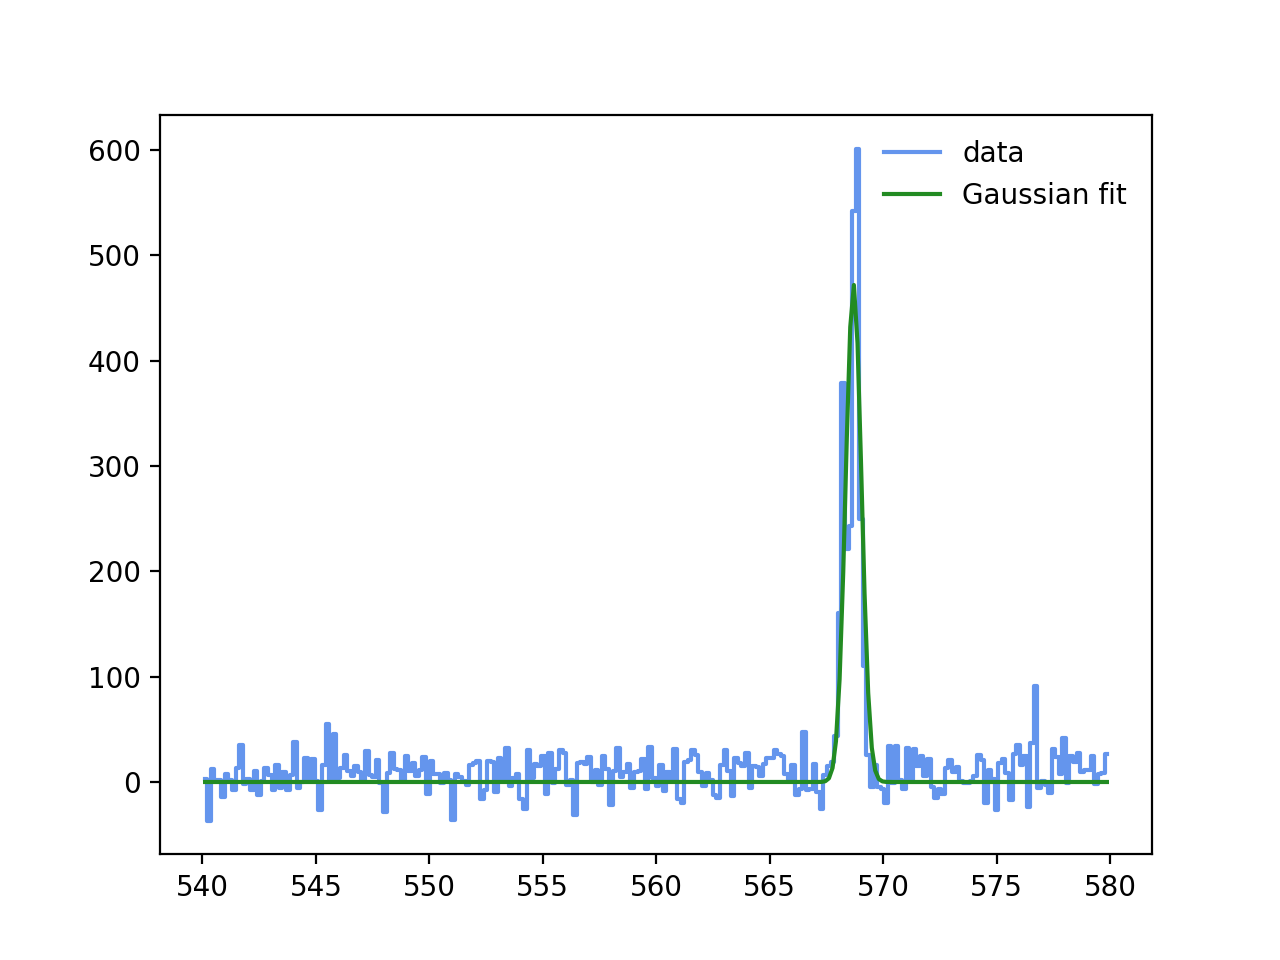

Estimated parameters:
 A = 472.04389, mu = 568.69658,  sigma = 0.34713 

Uncertainties in the estimated parameters: 
 σ²(A) = 340.03114, σ²(mu) = 0.00024, σ²(sigma) = 0.00025 

Covariance matrix: 
 [[ 3.40031137e+02  2.25377421e-04 -1.68656409e-01]
 [ 2.25377421e-04  2.43884738e-04 -3.36115890e-07]
 [-1.68656409e-01 -3.36115890e-07  2.48154168e-04]]


<IPython.core.display.Javascript object>


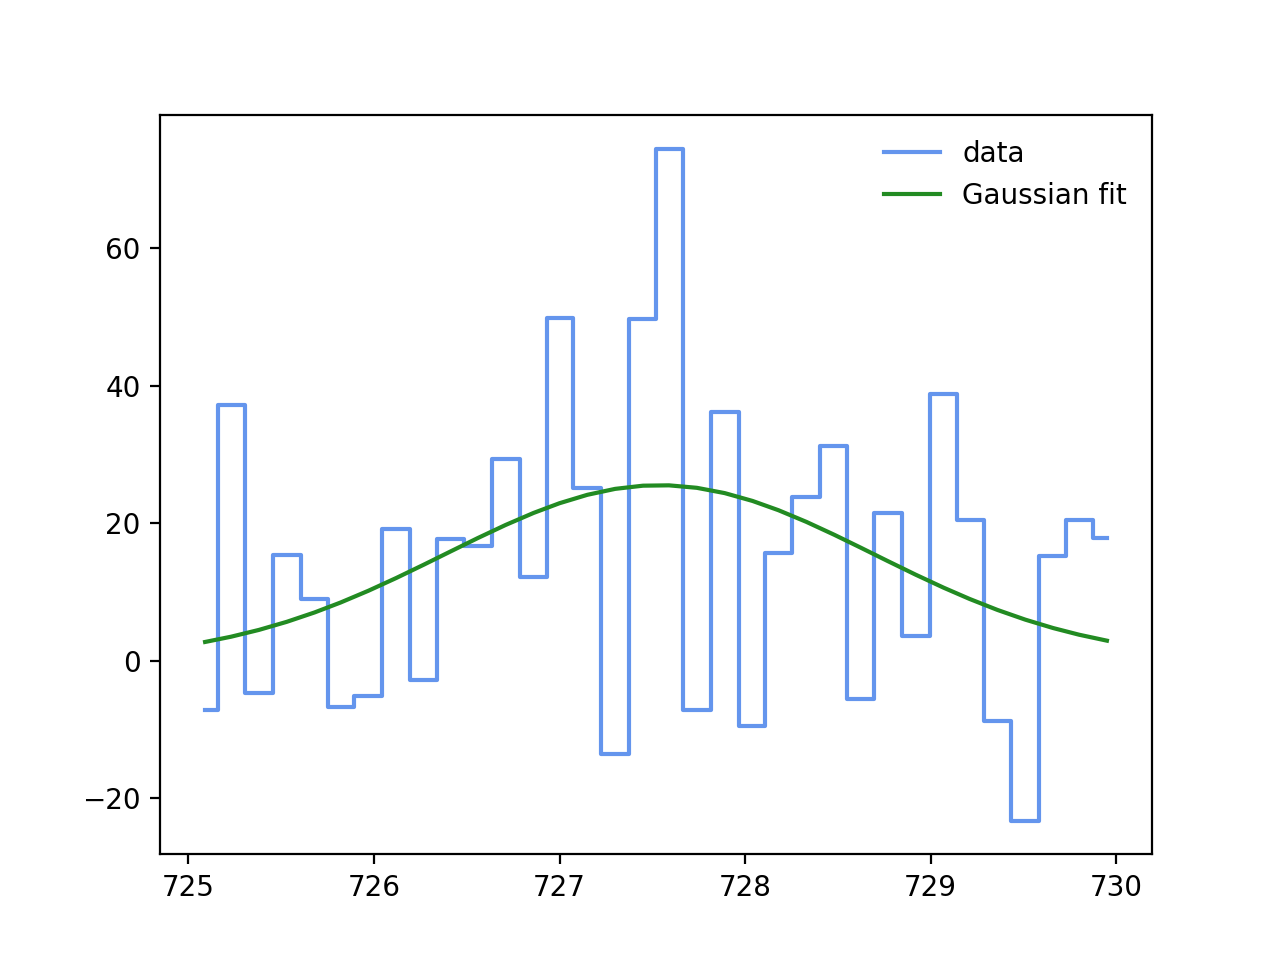

Estimated parameters:
 A = 25.53001, mu = 727.53856,  sigma = 1.15533 

Uncertainties in the estimated parameters: 
 σ²(A) = 47.90453, σ²(mu) = 0.13023, σ²(sigma) = 0.14408 

Covariance matrix: 
 [[ 4.79045283e+01 -5.60051014e-03 -1.55664719e+00]
 [-5.60051014e-03  1.30231458e-01  4.71448866e-04]
 [-1.55664719e+00  4.71448866e-04  1.44081160e-01]]


<IPython.core.display.Javascript object>


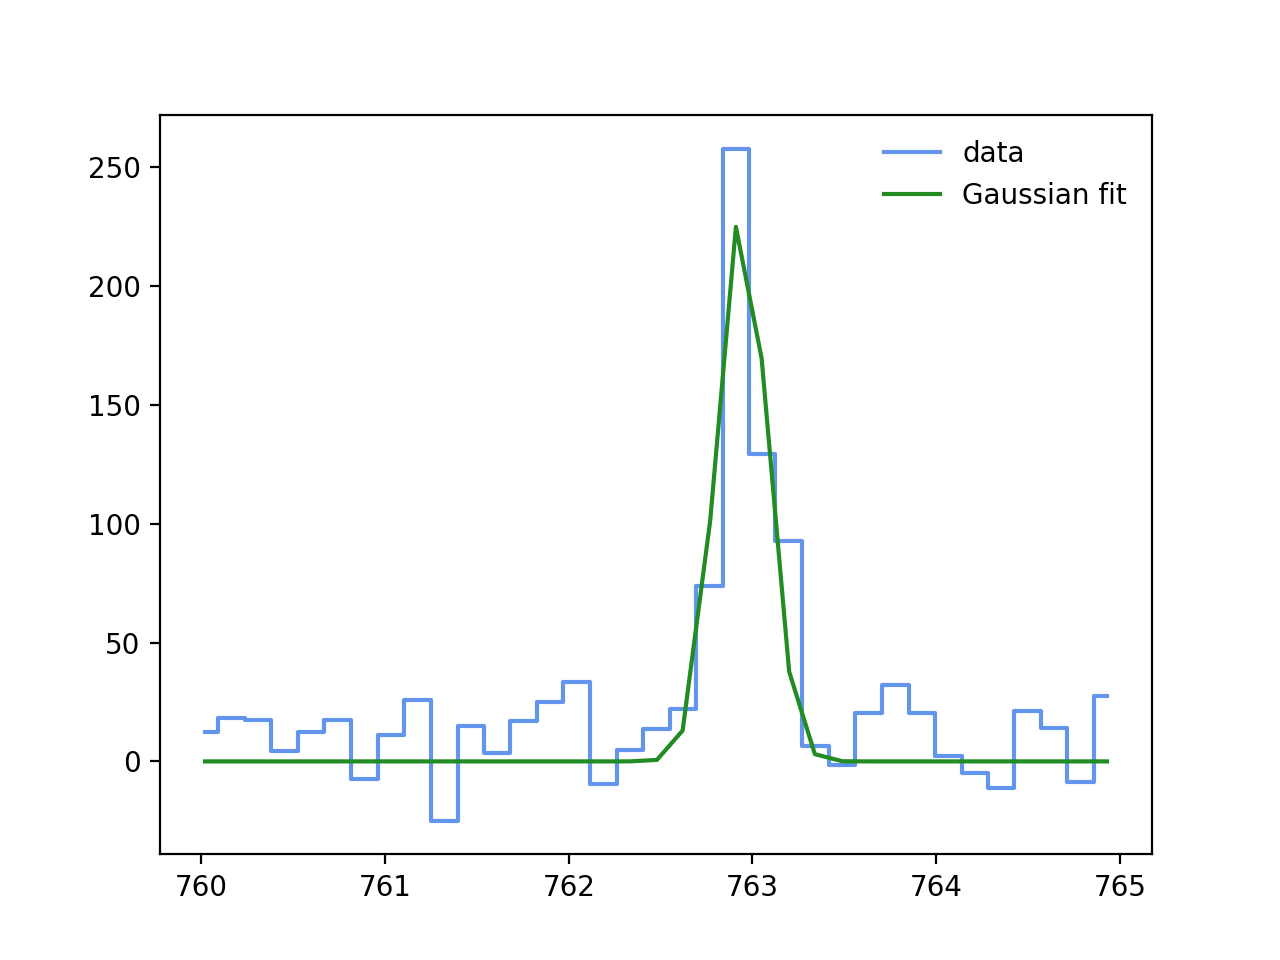

Estimated parameters:
 A = 232.02634, mu = 762.94341,  sigma = 0.13469 

Uncertainties in the estimated parameters: 
 σ²(A) = 423.49905, σ²(mu) = 0.00020, σ²(sigma) = 0.00020 

Covariance matrix: 
 [[ 4.23499048e+02  1.16925054e-03 -1.68278426e-01]
 [ 1.16925054e-03  1.95791471e-04  1.48021341e-06]
 [-1.68278426e-01  1.48021341e-06  2.00885855e-04]]


<IPython.core.display.Javascript object>


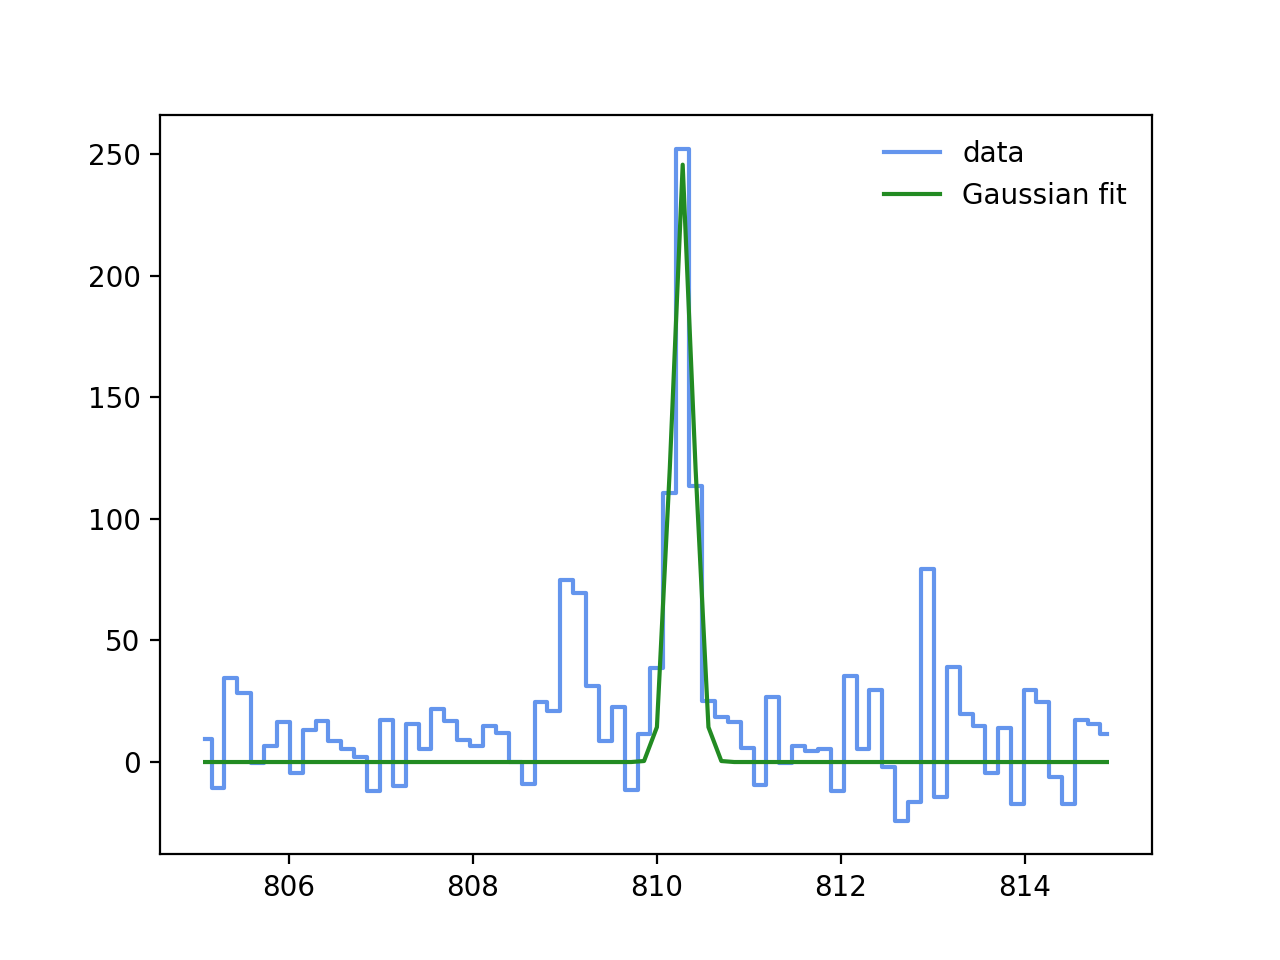

Estimated parameters:
 A = 245.63990, mu = 810.27996,  sigma = 0.11748 

Uncertainties in the estimated parameters: 
 σ²(A) = 499.96838, σ²(mu) = 0.00017, σ²(sigma) = 0.00014 

Covariance matrix: 
 [[ 4.99968379e+02 -6.22472279e-07  1.45040873e-01]
 [-6.22472279e-07  1.65645251e-04 -6.62538668e-09]
 [ 1.45040873e-01 -6.62538668e-09  1.42539809e-04]]


<IPython.core.display.Javascript object>


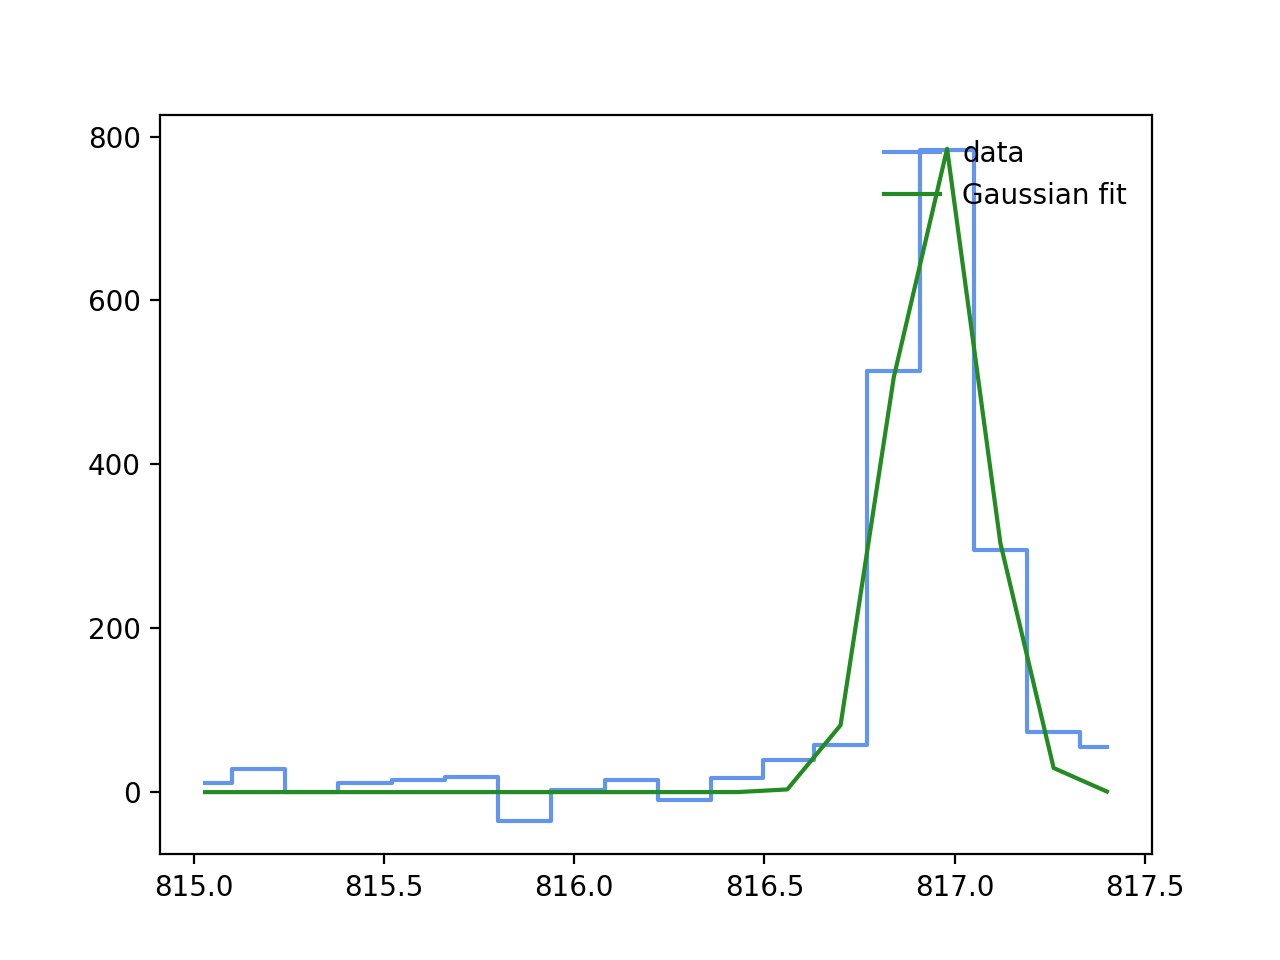

Estimated parameters:
 A = 803.72416, mu = 816.95424,  sigma = 0.11888 

Uncertainties in the estimated parameters: 
 σ²(A) = 666.57730, σ²(mu) = 0.00002, σ²(sigma) = 0.00002 

Covariance matrix: 
 [[ 6.66577305e+02 -3.63754018e-03 -6.36030970e-02]
 [-3.63754018e-03  2.00748960e-05  9.26724401e-07]
 [-6.36030970e-02  9.26724401e-07  1.89847362e-05]]


<IPython.core.display.Javascript object>


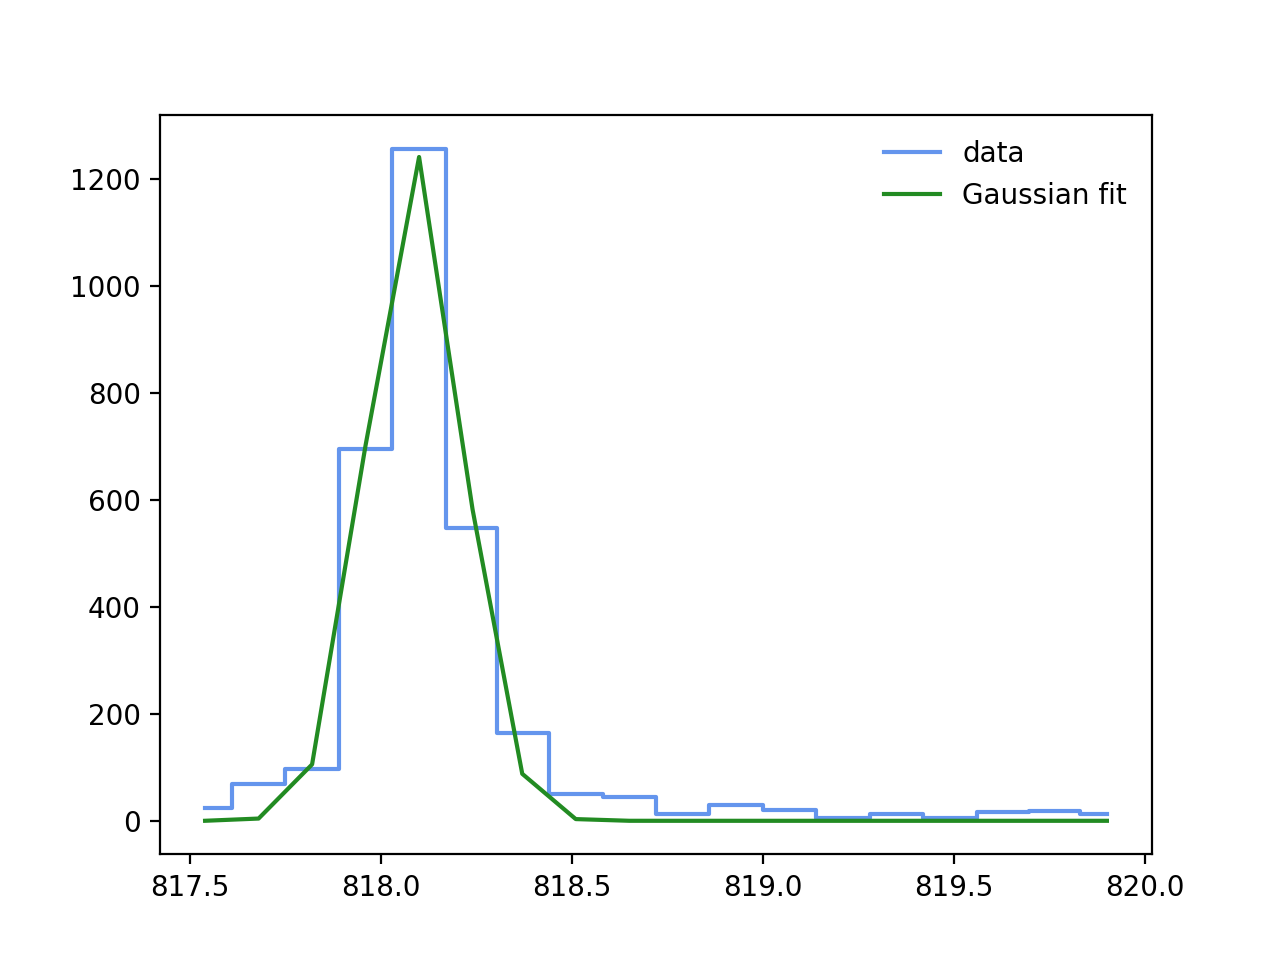

Estimated parameters:
 A = 1244.95809, mu = 818.09010,  sigma = 0.12155 

Uncertainties in the estimated parameters: 
 σ²(A) = 1152.91674, σ²(mu) = 0.00002, σ²(sigma) = 0.00001 

Covariance matrix: 
 [[ 1.15291674e+03 -5.88543178e-04 -6.94638411e-02]
 [-5.88543178e-04  1.53639962e-05  5.75920948e-09]
 [-6.94638411e-02  5.75920948e-09  1.36663607e-05]]


In [18]:
peak1 = fittingFunctions.perform_Gaussian_fit(x=wavelength, 
                                              y=counts,      
                                              region_start=540,   # bins where to start fitting
                                              region_stop=580,    # bins where to stop fitting
                                              mu_guess=560,       # guess for the position of peak centroid
                                              A_guess=500,       # guess for the amplitude of the peak
                                              sigma_guess=1)      # guess for the sigma

peak2 = fittingFunctions.perform_Gaussian_fit(x=wavelength, 
                                              y=counts,      
                                              region_start=725,   # bins where to start fitting
                                              region_stop=730,    # bins where to stop fitting
                                              mu_guess=727,       # guess for the position of peak centroid
                                              A_guess=300,       # guess for the amplitude of the peak
                                              sigma_guess=1)  

peak2 = fittingFunctions.perform_Gaussian_fit(x=wavelength, 
                                              y=counts,      
                                              region_start=760,   # bins where to start fitting
                                              region_stop=765,    # bins where to stop fitting
                                              mu_guess=763,       # guess for the position of peak centroid
                                              A_guess=500,       # guess for the amplitude of the peak
                                              sigma_guess=1)      # guess for the sigma

peak2 = fittingFunctions.perform_Gaussian_fit(x=wavelength, 
                                              y=counts,      
                                              region_start=805,   # bins where to start fitting
                                              region_stop=815,    # bins where to stop fitting
                                              mu_guess=812,       # guess for the position of peak centroid
                                              A_guess=500,       # guess for the amplitude of the peak
                                              sigma_guess=1)      # guess for the sigma


peak2 = fittingFunctions.perform_Gaussian_fit(x=wavelength, 
                                              y=counts,      
                                              region_start=815,   # bins where to start fitting
                                              region_stop=817.5,    # bins where to stop fitting
                                              mu_guess=817,       # guess for the position of peak centroid
                                              A_guess=1000,       # guess for the amplitude of the peak
                                              sigma_guess=1)      # guess for the sigma


peak2 = fittingFunctions.perform_Gaussian_fit(x=wavelength, 
                                              y=counts,      
                                              region_start=817.5,   # bins where to start fitting
                                              region_stop=820,    # bins where to stop fitting
                                              mu_guess=818,       # guess for the position of peak centroid
                                              A_guess=1000,       # guess for the amplitude of the peak
                                              sigma_guess=1)      # guess for the sigma

<IPython.core.display.Javascript object>


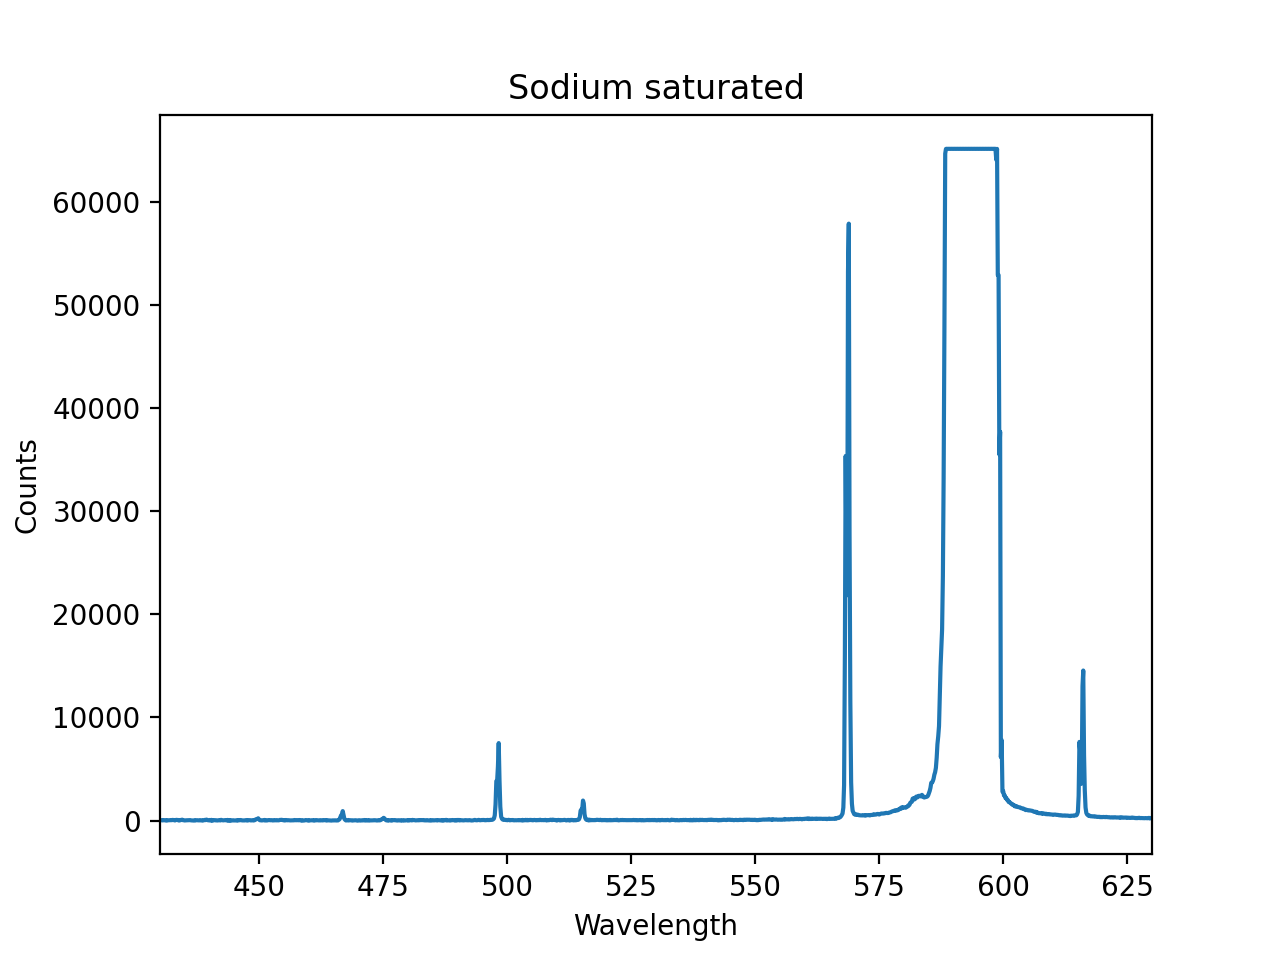

Text(0, 0.5, 'Counts')

In [19]:
import sys, os

# Package that supports mathmatical operations on arrays
import numpy as np  

# Package that supports operations for data structures and numeric tables
import pandas as pd

# Package for plotting; 
# first line makes plots interactive, 
# second actually loads the library
%matplotlib notebook
import matplotlib.pyplot as plt

# Function that fits a curve to data 
from scipy.optimize import curve_fit

sys.path.append('./lib')
import fittingFunctions

# Specify the absolute path for the saturated sodium spectrum inside quotation marks:
df = pd.read_csv("/Users/Yash/Downloads/FYSB 24/Spectro project data/saturatedNa_1804350U2.txt", 
    sep=";",    # Here we specify that values are seperated by semicolons.
    header=6)   # This skips the first rows of the file containing information about the acquisiton settings

    # Check if your spectrum txt file contains of 4 or 5 coulumns. If you have 4 coulumns use the adapted 'names'-array the line below.        
    # names=["Wavelength", "Count sample", "Background", "Reference"])
names=["Wavelength", "Count sample", "Background", "Reference", "Corrected for dark"]                 
                 
df = df.stack().str.replace(',','.').unstack() # Turns the  ',' in the data frame to a point
data = df.to_numpy() #Converts the data frame into an Numpy array
wavelength = np.array(list(data[:, 0]), dtype=float) #Turns the Numpy 2d array in a regular 2D float array
counts = np.array(list(data[:, 1]), dtype=float) # If you have saved 5 coulumns, use the 'Corrected for dark values' by changing the '1' to a '4'.

plt.figure()
plt.plot(wavelength, counts)
plt.show()
plt.title("Sodium saturated")      # set title of the plot
plt.xlabel("Wavelength")   # set label for x-axis 
plt.xlim(430, 630)         # set range for x-axis
plt.ylabel("Counts")       # set label for Y-axis 

<IPython.core.display.Javascript object>


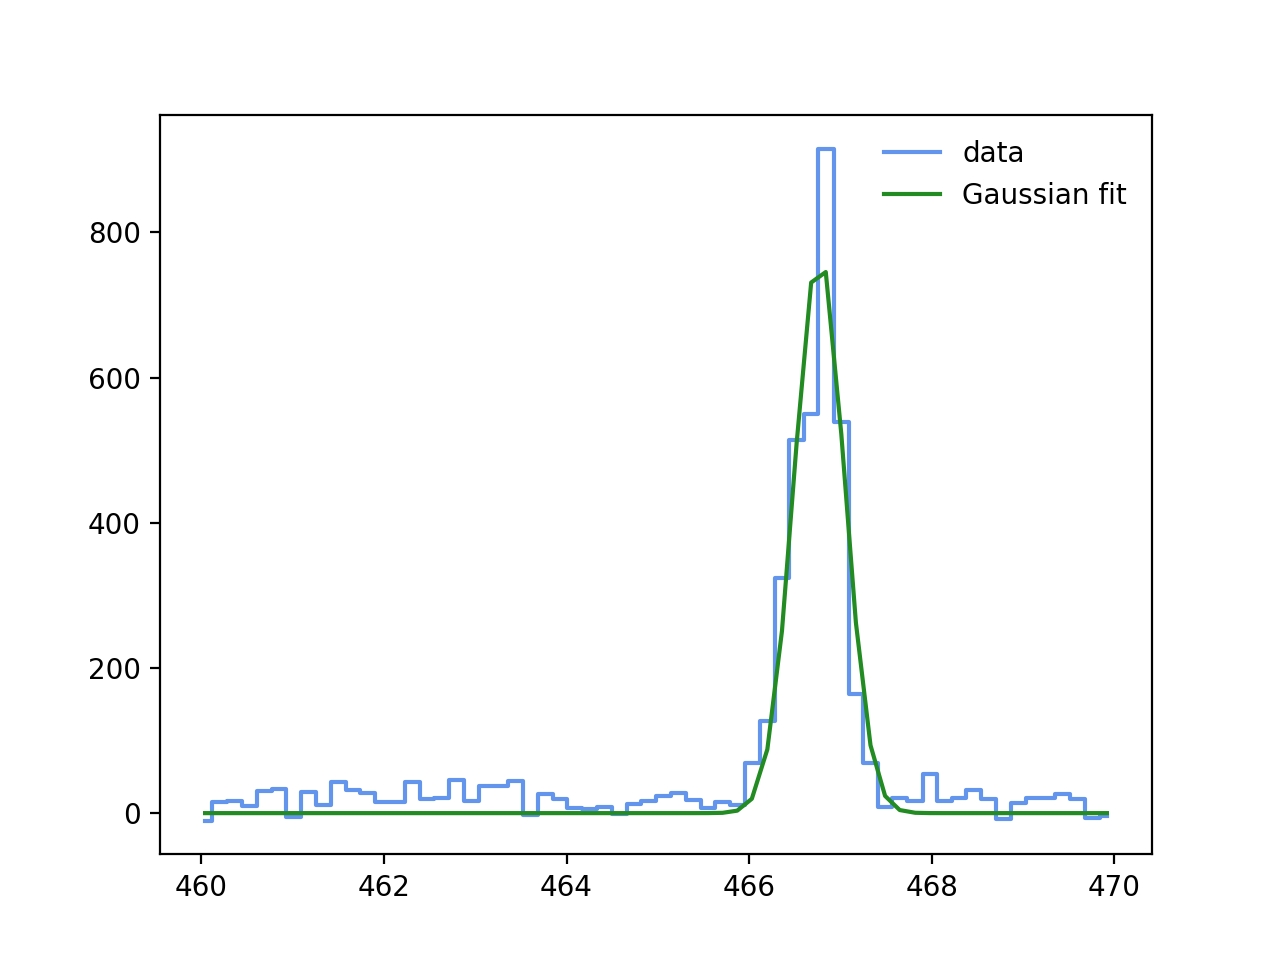

Estimated parameters:
 A = 770.81761, mu = 466.76910,  sigma = 0.27306 

Uncertainties in the estimated parameters: 
 σ²(A) = 945.05742, σ²(mu) = 0.00016, σ²(sigma) = 0.00016 

Covariance matrix: 
 [[9.45057416e+02 5.33393167e-03 2.21660861e-01]
 [5.33393167e-03 1.57643642e-04 8.89517955e-07]
 [2.21660861e-01 8.89517955e-07 1.56348418e-04]]


<IPython.core.display.Javascript object>


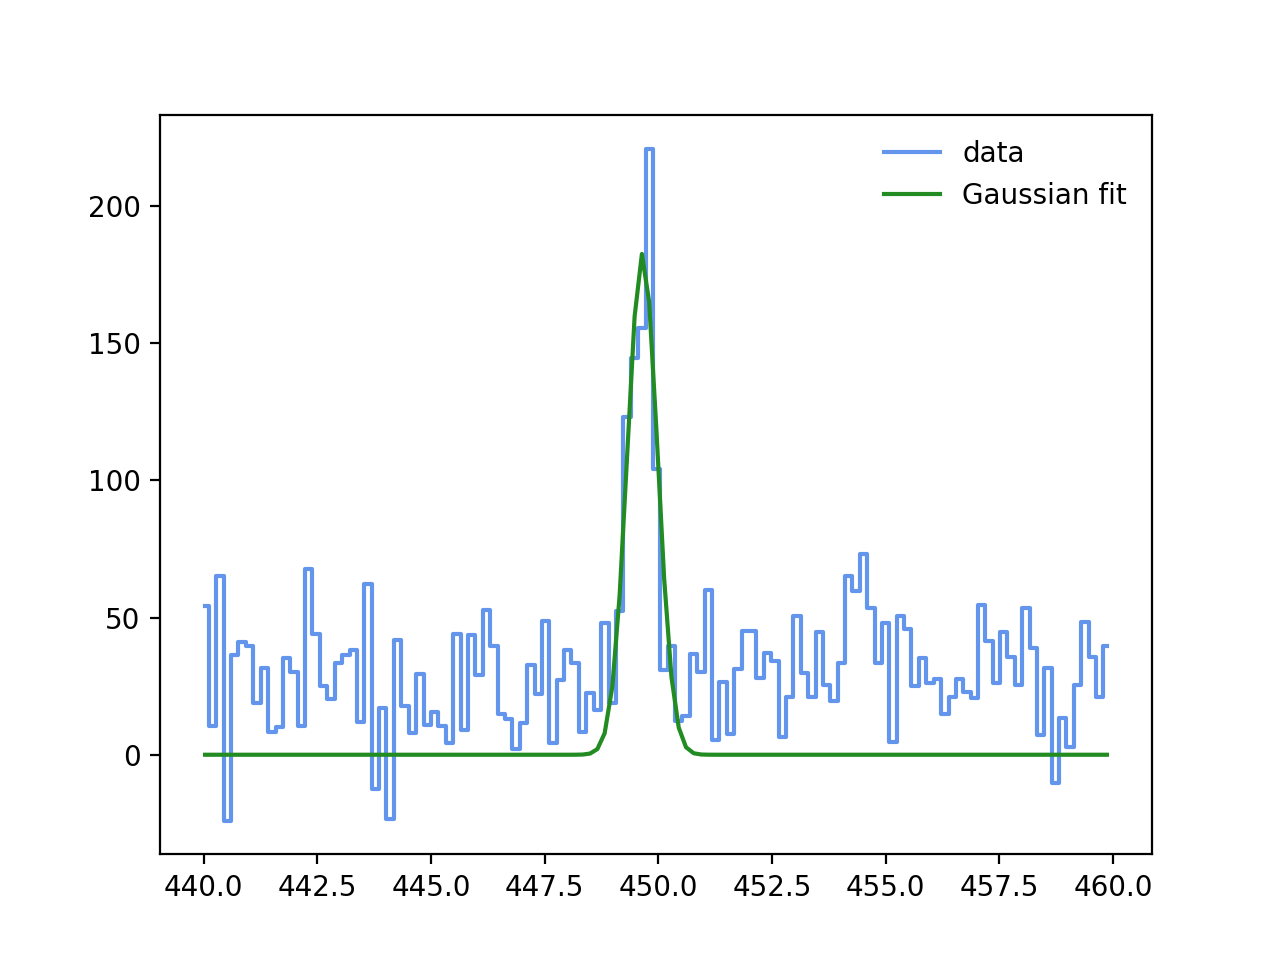

Estimated parameters:
 A = 182.56996, mu = 449.65088,  sigma = 0.33099 

Uncertainties in the estimated parameters: 
 σ²(A) = 466.04172, σ²(mu) = 0.00208, σ²(sigma) = 0.00206 

Covariance matrix: 
 [[ 4.66041721e+02 -6.84937004e-03 -5.60284812e-01]
 [-6.84937004e-03  2.08448131e-03  1.32157831e-05]
 [-5.60284812e-01  1.32157831e-05  2.05548755e-03]]


<IPython.core.display.Javascript object>


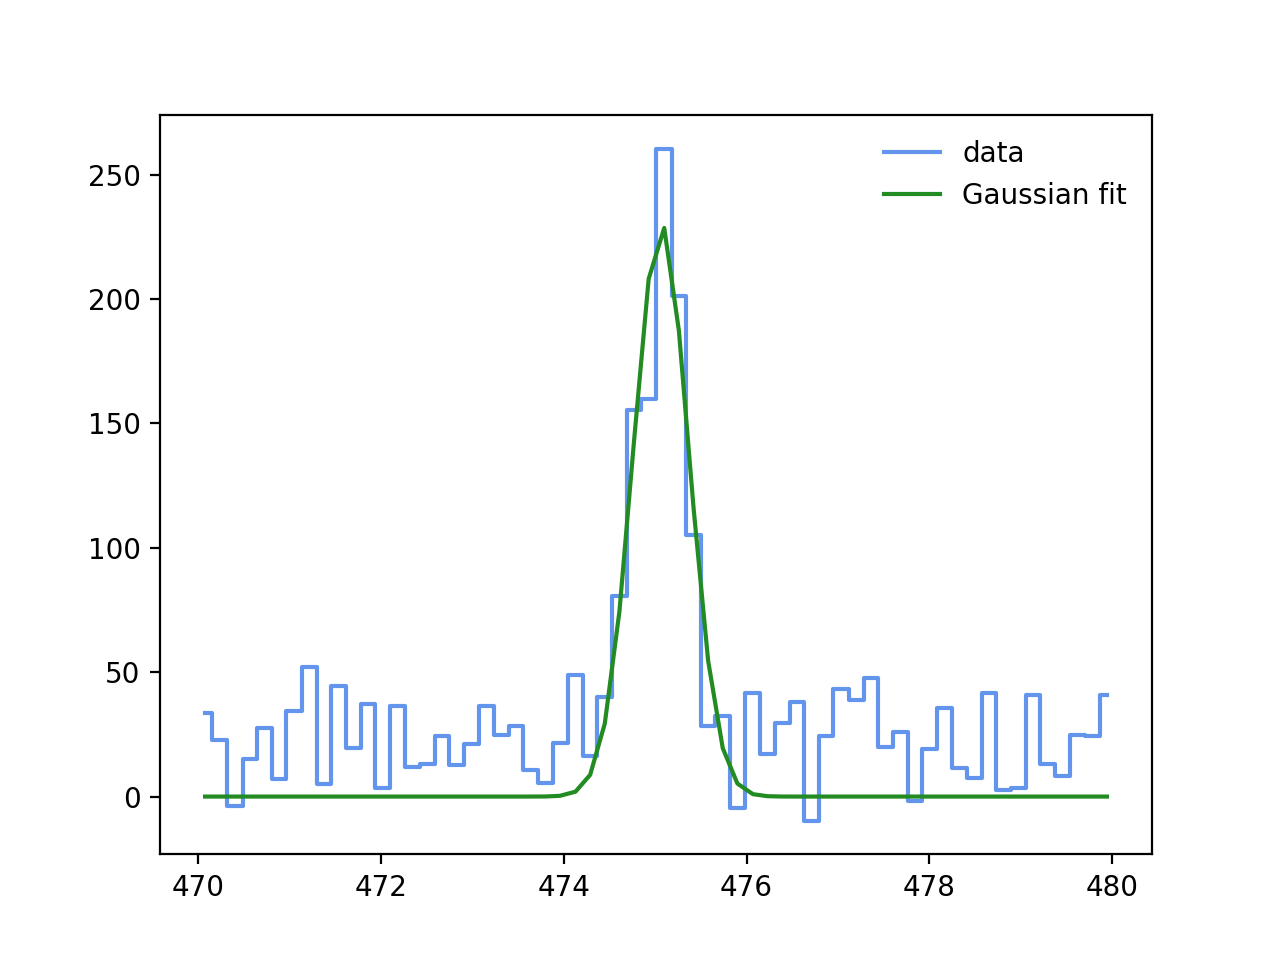

Estimated parameters:
 A = 230.06633, mu = 475.06572,  sigma = 0.30328 

Uncertainties in the estimated parameters: 
 σ²(A) = 340.14678, σ²(mu) = 0.00077, σ²(sigma) = 0.00077 

Covariance matrix: 
 [[ 3.40146784e+02 -3.01389343e-03 -2.98921985e-01]
 [-3.01389343e-03  7.66634918e-04  2.83297199e-06]
 [-2.98921985e-01  2.83297199e-06  7.73726433e-04]]


<IPython.core.display.Javascript object>


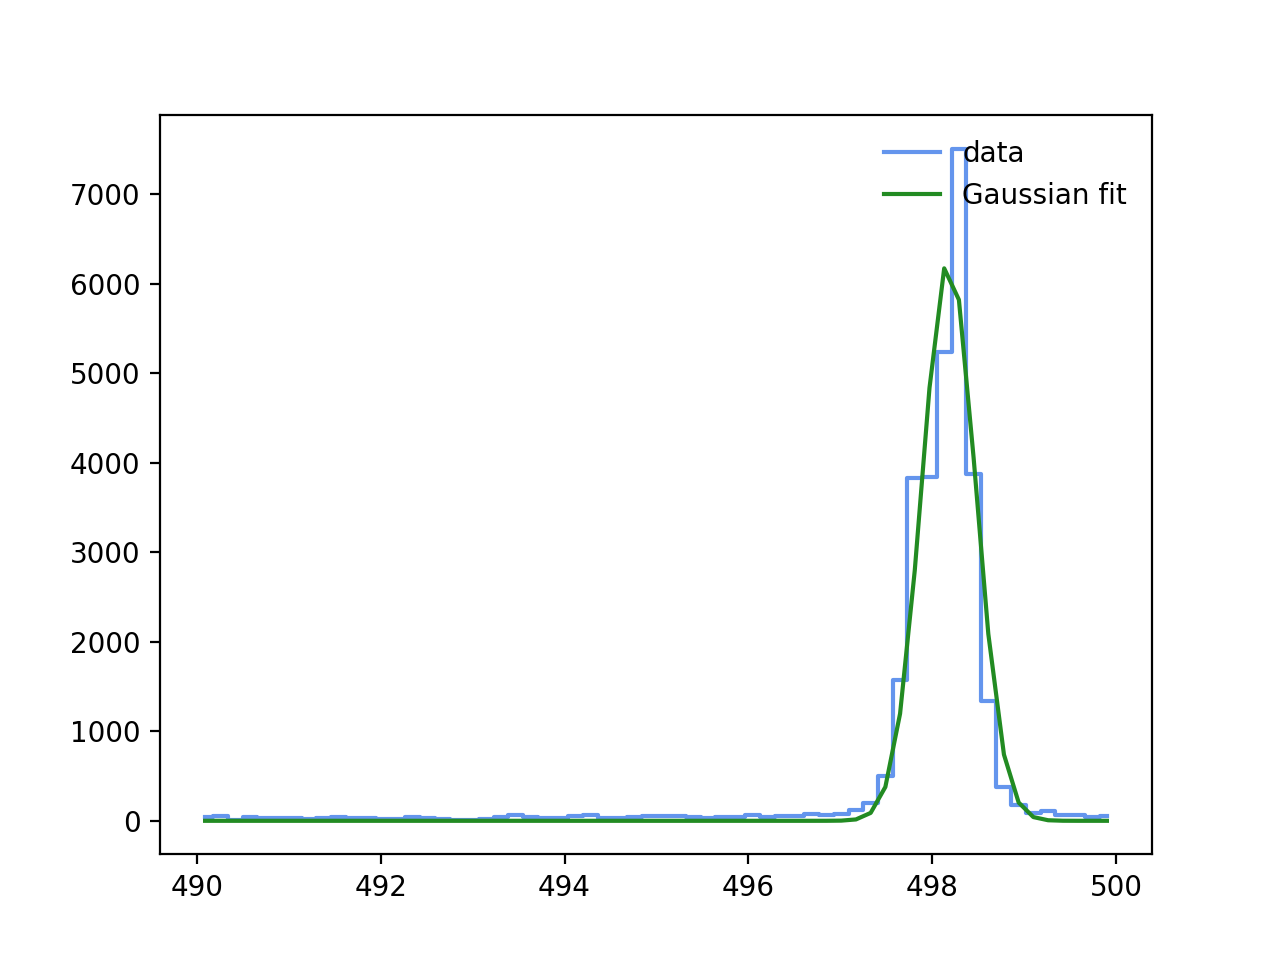

Estimated parameters:
 A = 6262.32582, mu = 498.17902,  sigma = 0.29080 

Uncertainties in the estimated parameters: 
 σ²(A) = 53747.32115, σ²(mu) = 0.00016, σ²(sigma) = 0.00016 

Covariance matrix: 
 [[ 5.37473211e+04 -8.67623883e-03  1.67440021e+00]
 [-8.67623883e-03  1.55052660e-04 -1.23208167e-06]
 [ 1.67440021e+00 -1.23208167e-06  1.56179395e-04]]


<IPython.core.display.Javascript object>


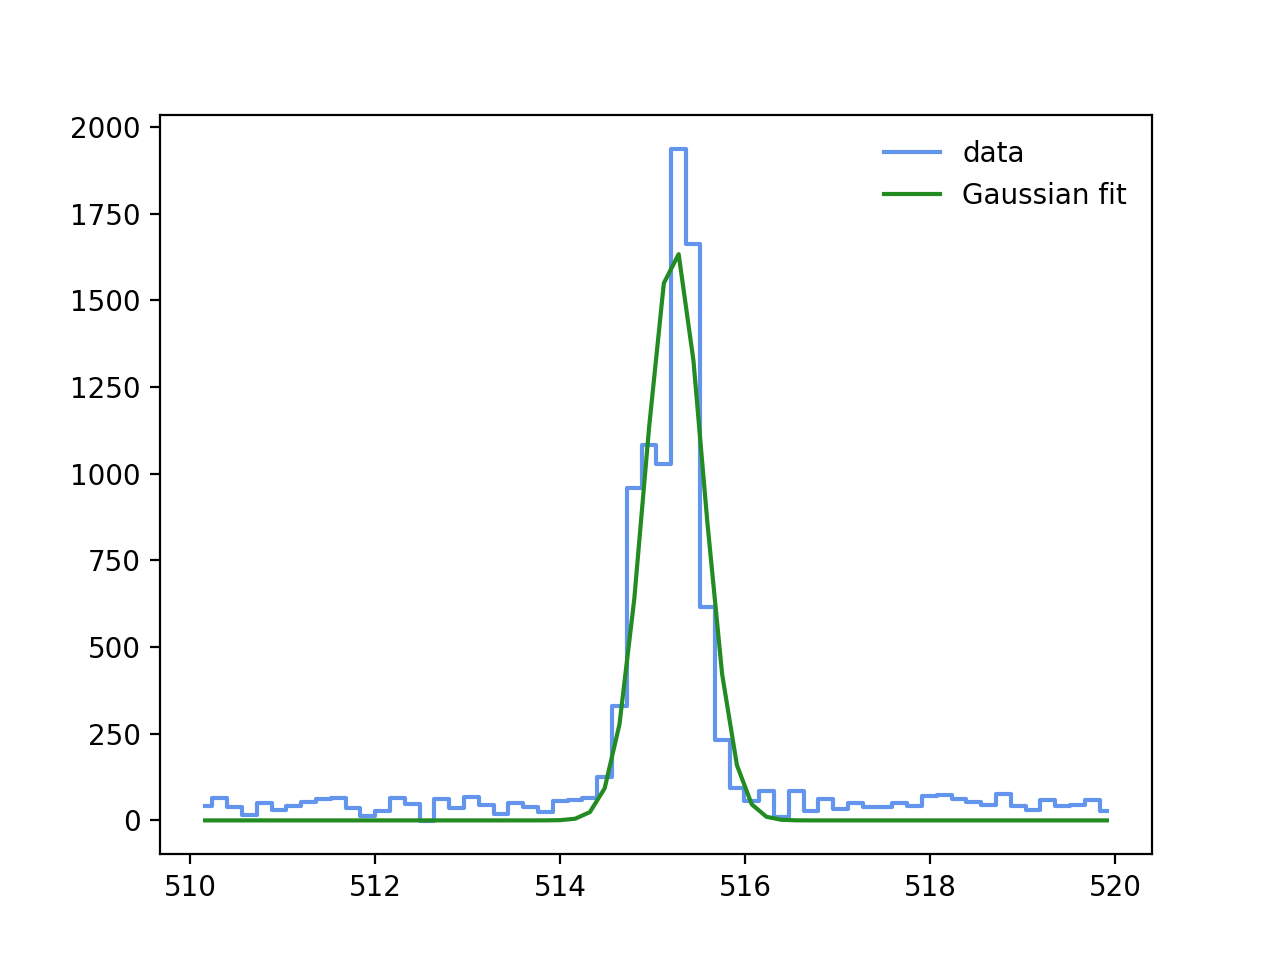

Estimated parameters:
 A = 1652.49971, mu = 515.23217,  sigma = 0.31331 

Uncertainties in the estimated parameters: 
 σ²(A) = 5914.14081, σ²(mu) = 0.00028, σ²(sigma) = 0.00028 

Covariance matrix: 
 [[ 5.91414081e+03 -7.31783174e-03 -7.52371901e-01]
 [-7.31783174e-03  2.80125543e-04 -1.33433186e-06]
 [-7.52371901e-01 -1.33433186e-06  2.83681595e-04]]


<IPython.core.display.Javascript object>


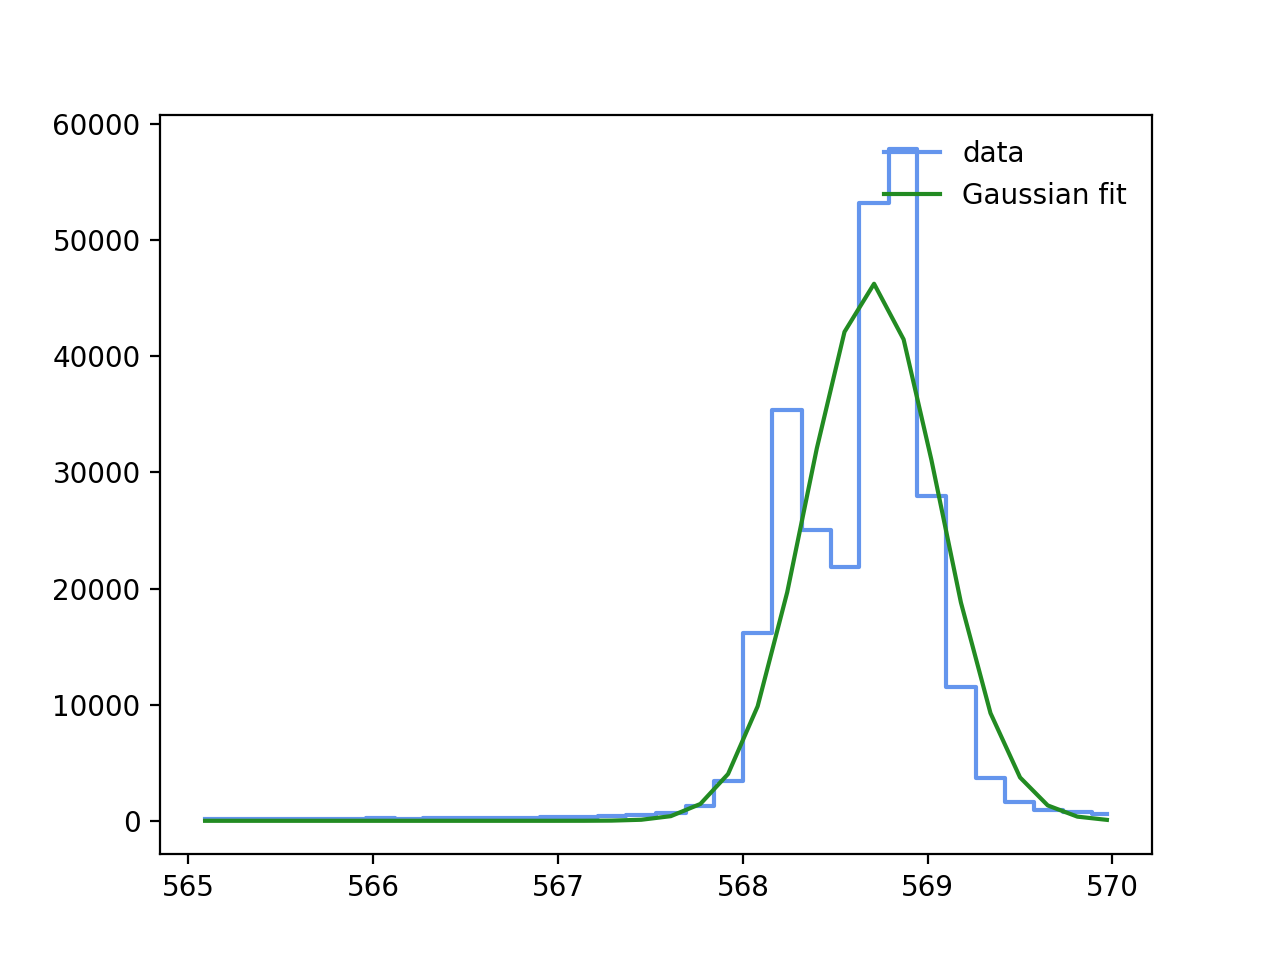

Estimated parameters:
 A = 46257.67181, mu = 568.70387,  sigma = 0.35483 

Uncertainties in the estimated parameters: 
 σ²(A) = 15072000.67347, σ²(mu) = 0.00118, σ²(sigma) = 0.00120 

Covariance matrix: 
 [[ 1.50720007e+07  4.12944401e-02 -7.79225448e+01]
 [ 4.12944401e-02  1.17787788e-03 -6.65271535e-07]
 [-7.79225448e+01 -6.65271535e-07  1.19675871e-03]]


<IPython.core.display.Javascript object>


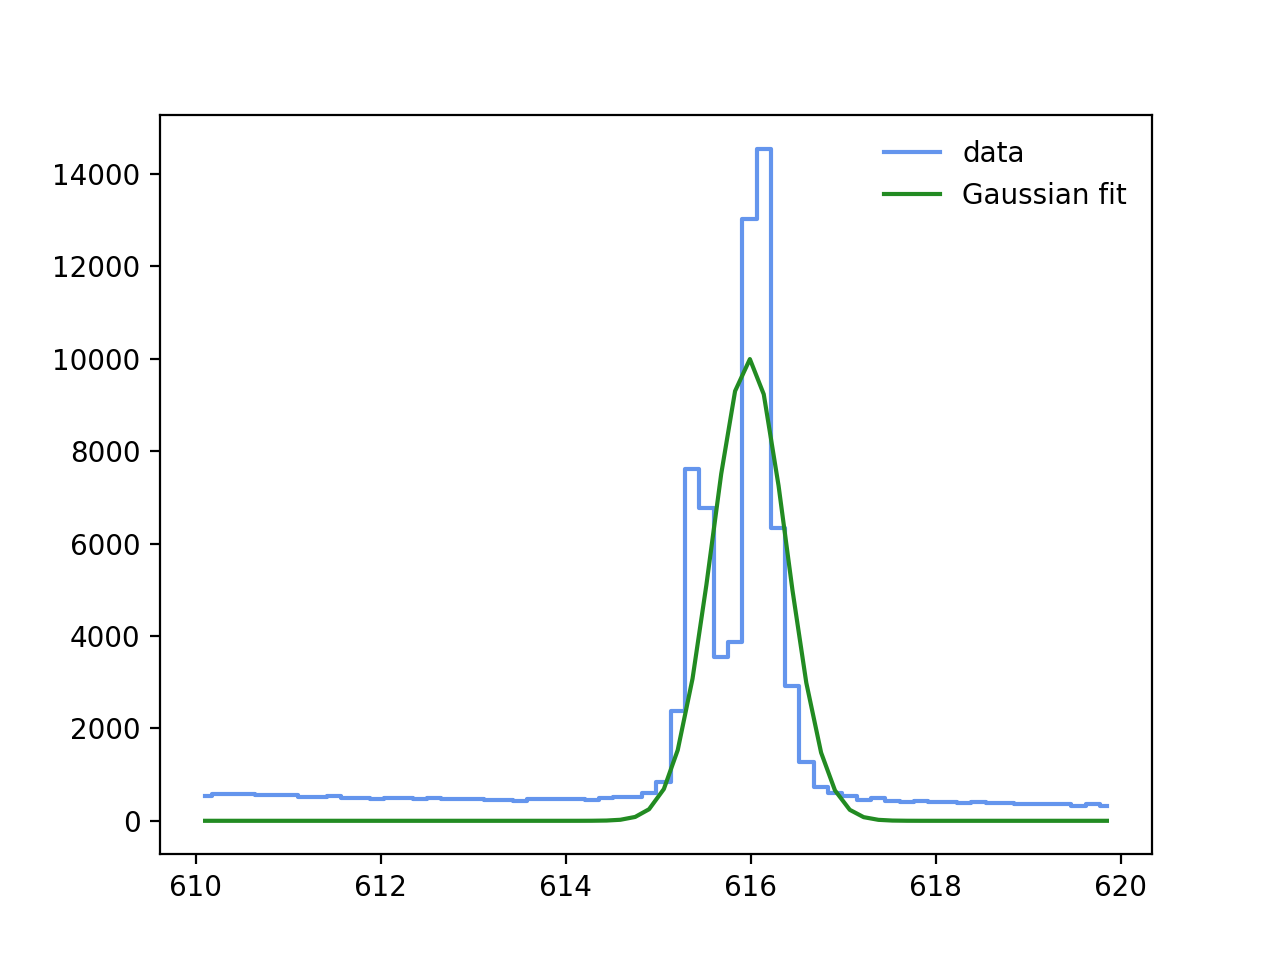

Estimated parameters:
 A = 9996.99212, mu = 615.98121,  sigma = 0.39813 

Uncertainties in the estimated parameters: 
 σ²(A) = 681233.89184, σ²(mu) = 0.00143, σ²(sigma) = 0.00144 

Covariance matrix: 
 [[ 6.81233892e+05  5.39762503e-03 -1.80914876e+01]
 [ 5.39762503e-03  1.43277290e-03 -6.35114005e-06]
 [-1.80914876e+01 -6.35114005e-06  1.43580751e-03]]


In [25]:
peak1 = fittingFunctions.perform_Gaussian_fit(x=wavelength, 
                                              y=counts,      
                                              region_start=460,   # bins where to start fitting
                                              region_stop=470,    # bins where to stop fitting
                                              mu_guess=465,       # guess for the position of peak centroid
                                              A_guess=1000,       # guess for the amplitude of the peak
                                              sigma_guess=1)      # guess for the sigma

peak1 = fittingFunctions.perform_Gaussian_fit(x=wavelength, 
                                              y=counts,      
                                              region_start=440,   # bins where to start fitting
                                              region_stop=460,    # bins where to stop fitting
                                              mu_guess=450,       # guess for the position of peak centroid
                                              A_guess=100,       # guess for the amplitude of the peak
                                              sigma_guess=1)      # guess for the sigma


peak1 = fittingFunctions.perform_Gaussian_fit(x=wavelength, 
                                              y=counts,      
                                              region_start=470,   # bins where to start fitting
                                              region_stop=480,    # bins where to stop fitting
                                              mu_guess=475,       # guess for the position of peak centroid
                                              A_guess=100,       # guess for the amplitude of the peak
                                              sigma_guess=1)      # guess for the sigma

peak1 = fittingFunctions.perform_Gaussian_fit(x=wavelength, 
                                              y=counts,      
                                              region_start=490,   # bins where to start fitting
                                              region_stop=500,    # bins where to stop fitting
                                              mu_guess=495,       # guess for the position of peak centroid
                                              A_guess=1000,       # guess for the amplitude of the peak
                                              sigma_guess=1)      # guess for the sigma


peak1 = fittingFunctions.perform_Gaussian_fit(x=wavelength, 
                                              y=counts,      
                                              region_start=510,   # bins where to start fitting
                                              region_stop=520,    # bins where to stop fitting
                                              mu_guess=515,       # guess for the position of peak centroid
                                              A_guess=1000,       # guess for the amplitude of the peak
                                              sigma_guess=1)      # guess for the sigma


peak1 = fittingFunctions.perform_Gaussian_fit(x=wavelength, 
                                              y=counts,      
                                              region_start=565,   # bins where to start fitting
                                              region_stop=570,    # bins where to stop fitting
                                              mu_guess=565,       # guess for the position of peak centroid
                                              A_guess=60000,       # guess for the amplitude of the peak
                                              sigma_guess=1)      # guess for the sigma

peak1 = fittingFunctions.perform_Gaussian_fit(x=wavelength, 
                                              y=counts,      
                                              region_start=610,   # bins where to start fitting
                                              region_stop=620,    # bins where to stop fitting
                                              mu_guess=615,       # guess for the position of peak centroid
                                              A_guess=12000,       # guess for the amplitude of the peak
                                              sigma_guess=1)      # guess for the sigma

<IPython.core.display.Javascript object>


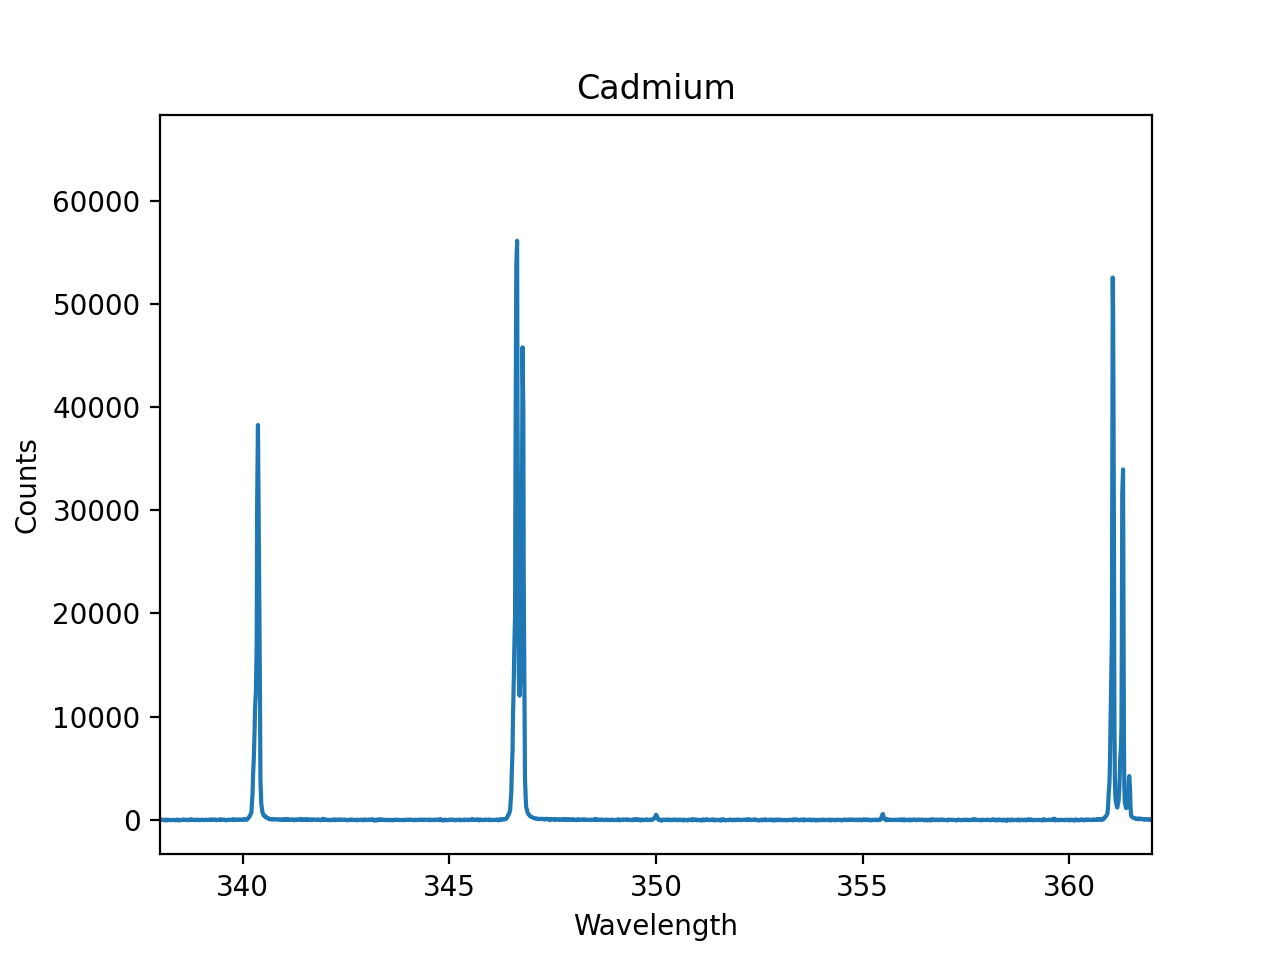

Text(0, 0.5, 'Counts')

In [45]:

import sys, os

# Package that supports mathmatical operations on arrays
import numpy as np  

# Package that supports operations for data structures and numeric tables
import pandas as pd

# Package for plotting; 
# first line makes plots interactive, 
# second actually loads the library
%matplotlib notebook
import matplotlib.pyplot as plt

# Function that fits a curve to data 
from scipy.optimize import curve_fit

sys.path.append('./lib')
import fittingFunctions

# Specify the absolute path for the cadmium spectrum inside quotation marks:
df = pd.read_csv("/Users/Yash/Downloads/FYSB 24/Spectro project data/Cadmium 340-362nm_1804349U2.txt", 
    sep=";",    # Here we specify that values are seperated by semicolons.
    header=6)   # This skips the first rows of the file containing information about the acquisiton settings
                 
    # Check if your spectrum txt file contains of 4 or 5 coulumns. If you have 4 coulumns use the adapted 'names'-array the line below.        
    # names=["Wavelength", "Count sample", "Background", "Reference"])
names=["Wavelength", "Count sample", "Background", "Reference", "Corrected for dark"]

df = df.stack().str.replace(',','.').unstack() # Turns the  ',' in the data frame to a point
data = df.to_numpy() #Converts the data frame into an Numpy array
wavelength = np.array(list(data[:, 0]), dtype=float) #Turns the Numpy 2d array in a regular 2D float array
counts = np.array(list(data[:, 4]), dtype=float) # If you have saved 5 coulumns, use the 'Corrected for dark values' by changing the '1' to a '4'.

plt.figure()
plt.plot(wavelength, counts)
plt.show()
plt.title("Cadmium")       # set title of the plot
plt.xlabel("Wavelength")   # set label for x-axis
plt.xlim(338, 362)         # set range for x-axis
plt.ylabel("Counts")       # set label for Y-axis 

<IPython.core.display.Javascript object>


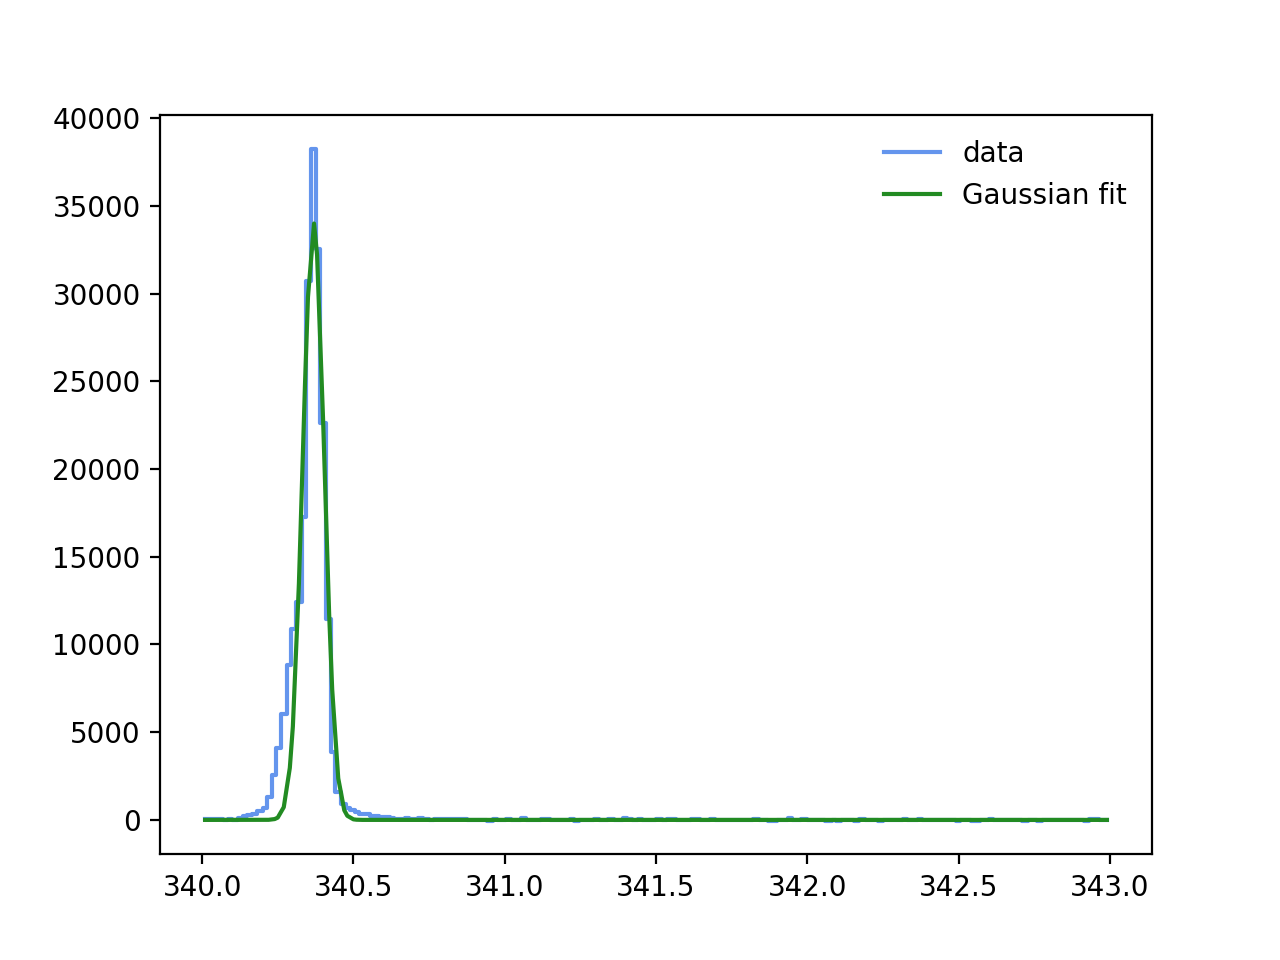

Estimated parameters:
 A = 34039.78429, mu = 340.36824,  sigma = 0.03542 

Uncertainties in the estimated parameters: 
 σ²(A) = 410859.60379, σ²(mu) = 0.00000, σ²(sigma) = 0.00000 

Covariance matrix: 
 [[ 4.10859604e+05  1.98334018e-02 -2.82906008e-01]
 [ 1.98334018e-02  6.67276741e-07 -1.60028631e-08]
 [-2.82906008e-01 -1.60028631e-08  6.35672076e-07]]


<IPython.core.display.Javascript object>


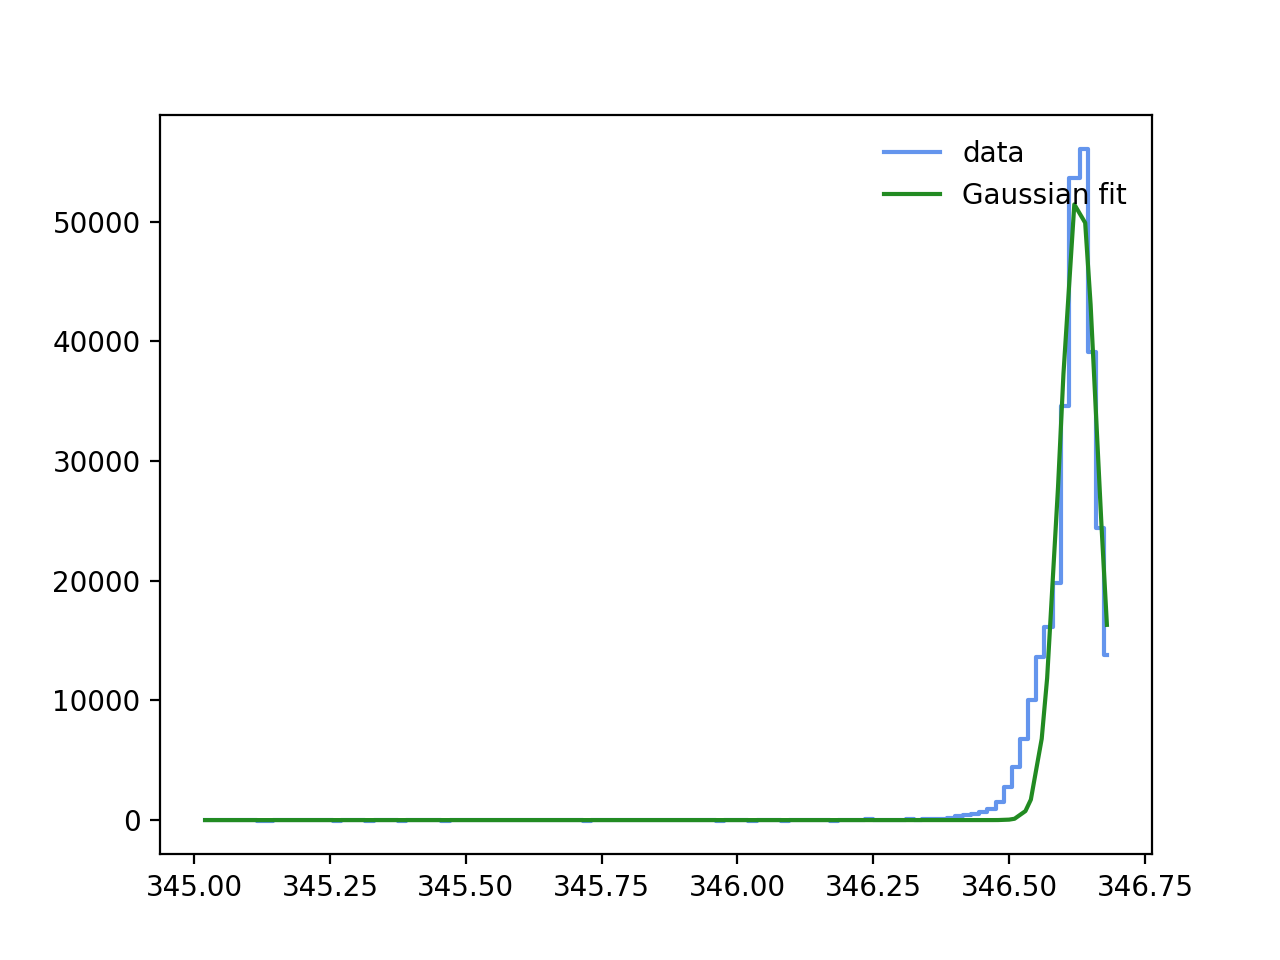

Estimated parameters:
 A = 53031.91612, mu = 346.62828,  sigma = 0.03368 

Uncertainties in the estimated parameters: 
 σ²(A) = 1412375.48163, σ²(mu) = 0.00000, σ²(sigma) = 0.00000 

Covariance matrix: 
 [[ 1.41237548e+06 -8.54930482e-02 -6.53851521e-01]
 [-8.54930482e-02  6.68979459e-07  8.03887191e-08]
 [-6.53851521e-01  8.03887191e-08  7.82590710e-07]]


<IPython.core.display.Javascript object>


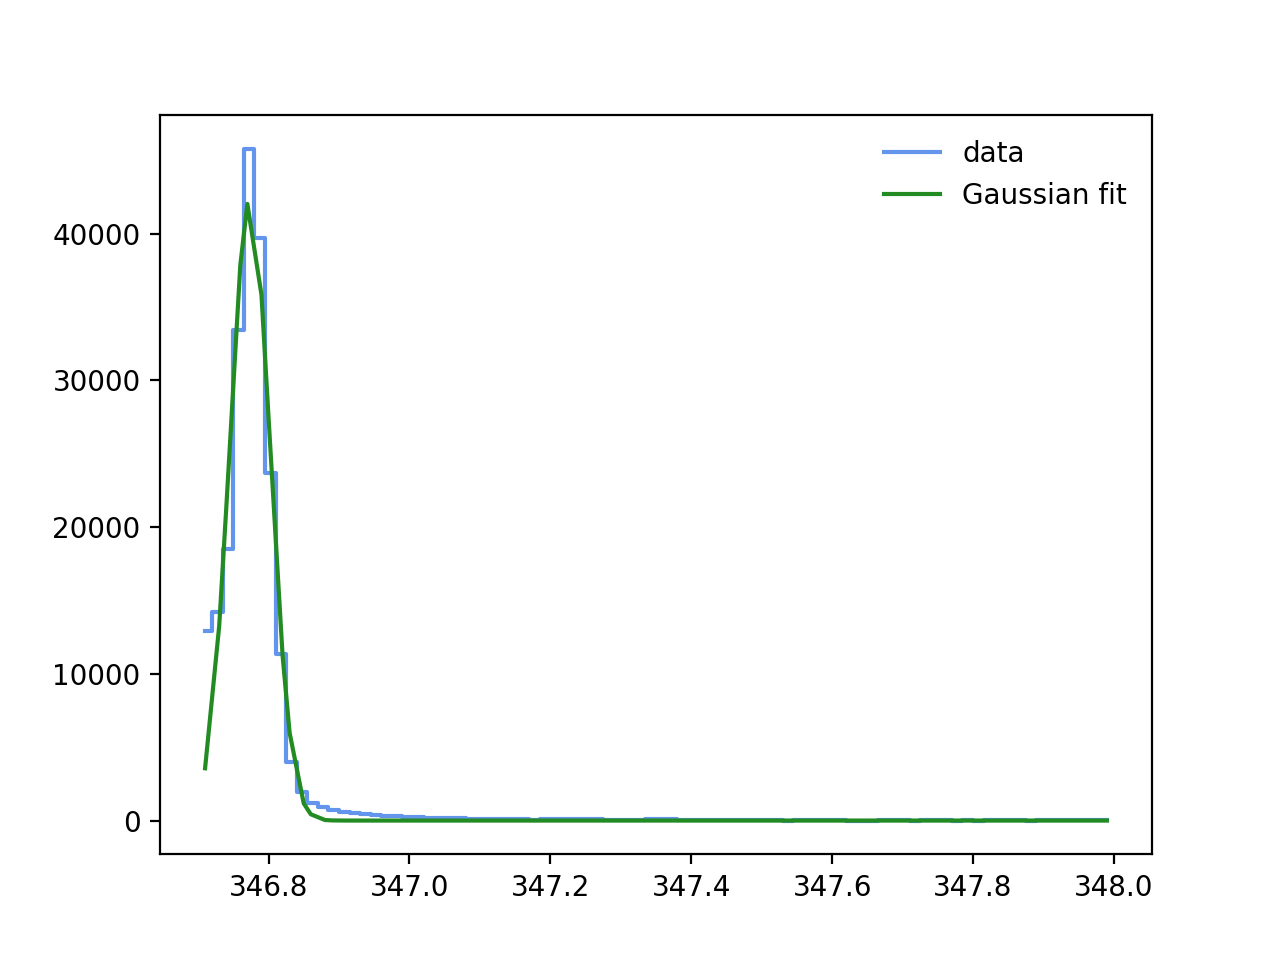

Estimated parameters:
 A = 42348.21849, mu = 346.77351,  sigma = 0.02854 

Uncertainties in the estimated parameters: 
 σ²(A) = 907341.95605, σ²(mu) = 0.00000, σ²(sigma) = 0.00000 

Covariance matrix: 
 [[9.07341956e+05 7.47858132e-03 4.16664885e-01]
 [7.47858132e-03 5.47474403e-07 1.07849438e-08]
 [4.16664885e-01 1.07849438e-08 5.64204420e-07]]


<IPython.core.display.Javascript object>


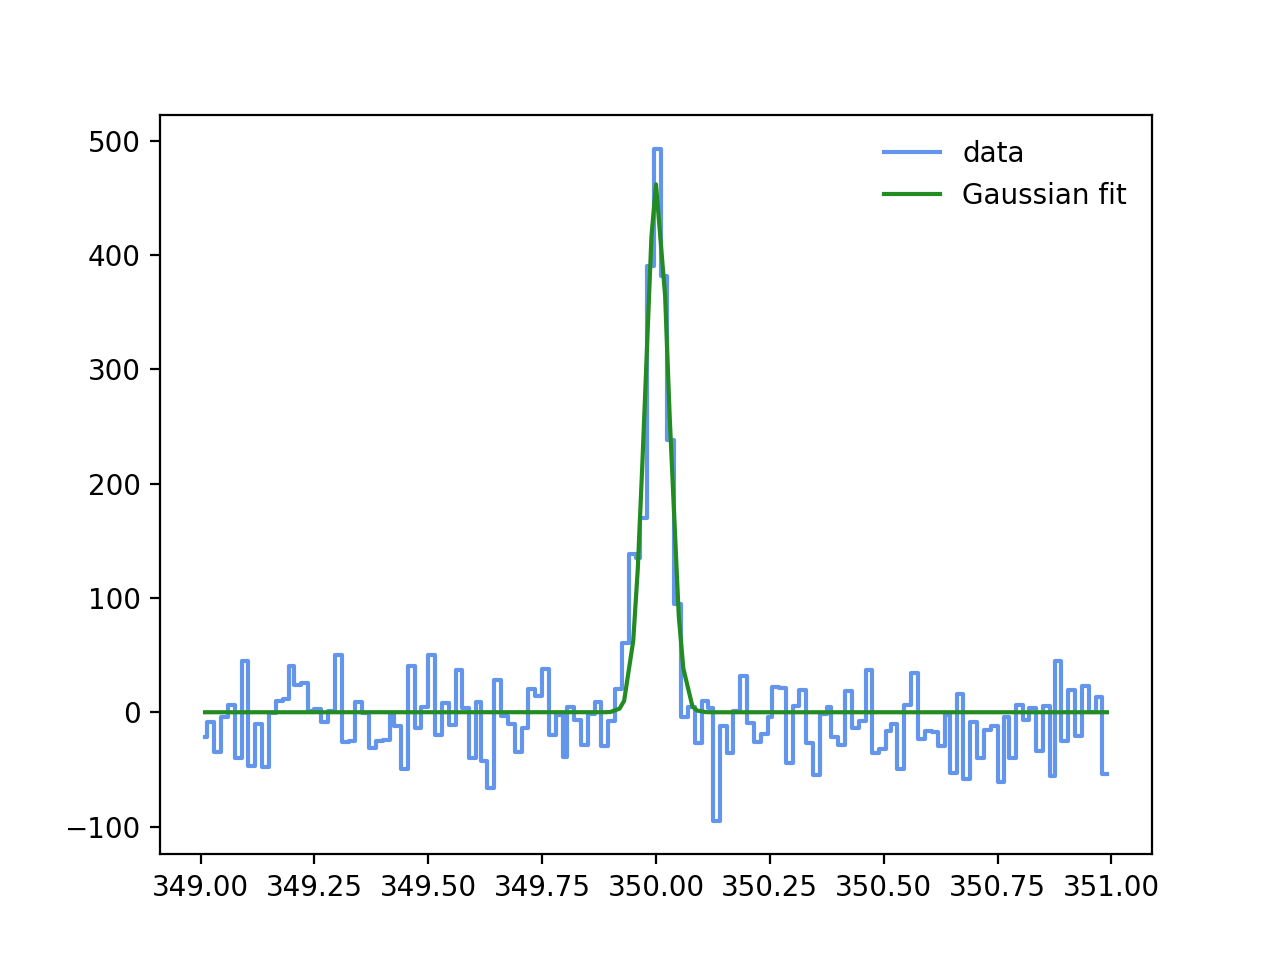

Estimated parameters:
 A = 463.30534, mu = 350.00200,  sigma = 0.02598 

Uncertainties in the estimated parameters: 
 σ²(A) = 421.13463, σ²(mu) = 0.00000, σ²(sigma) = 0.00000 

Covariance matrix: 
 [[ 4.21134631e+02 -1.75369773e-04  1.50275255e-02]
 [-1.75369773e-04  1.73291839e-06 -5.59511615e-08]
 [ 1.50275255e-02 -5.59511615e-08  1.63850750e-06]]


/Users/Yash/Downloads/FYSB 24/Introduction_jupyter_notebook/FYSB24 Atomic Spectroscopy Jupyter 2024/./lib/fittingFunctions.py:119: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


<IPython.core.display.Javascript object>


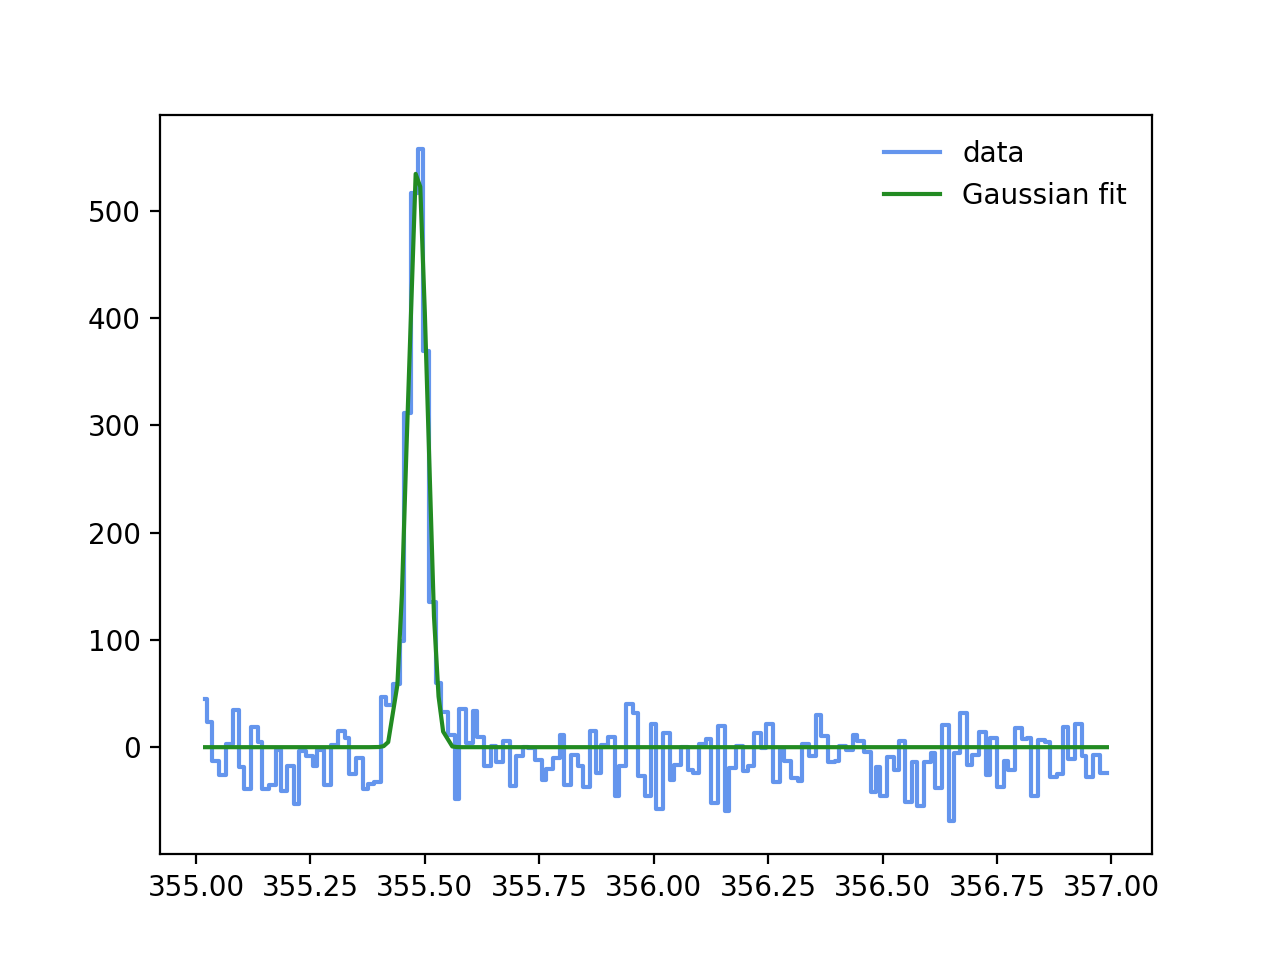

Estimated parameters:
 A = 544.45061, mu = 355.48402,  sigma = 0.02080 

Uncertainties in the estimated parameters: 
 σ²(A) = 329.96372, σ²(mu) = 0.00000, σ²(sigma) = 0.00000 

Covariance matrix: 
 [[ 3.29963724e+02 -2.98004914e-03  7.72112872e-03]
 [-2.98004914e-03  8.51087244e-07 -1.47806508e-07]
 [ 7.72112872e-03 -1.47806508e-07  6.67088168e-07]]


<IPython.core.display.Javascript object>


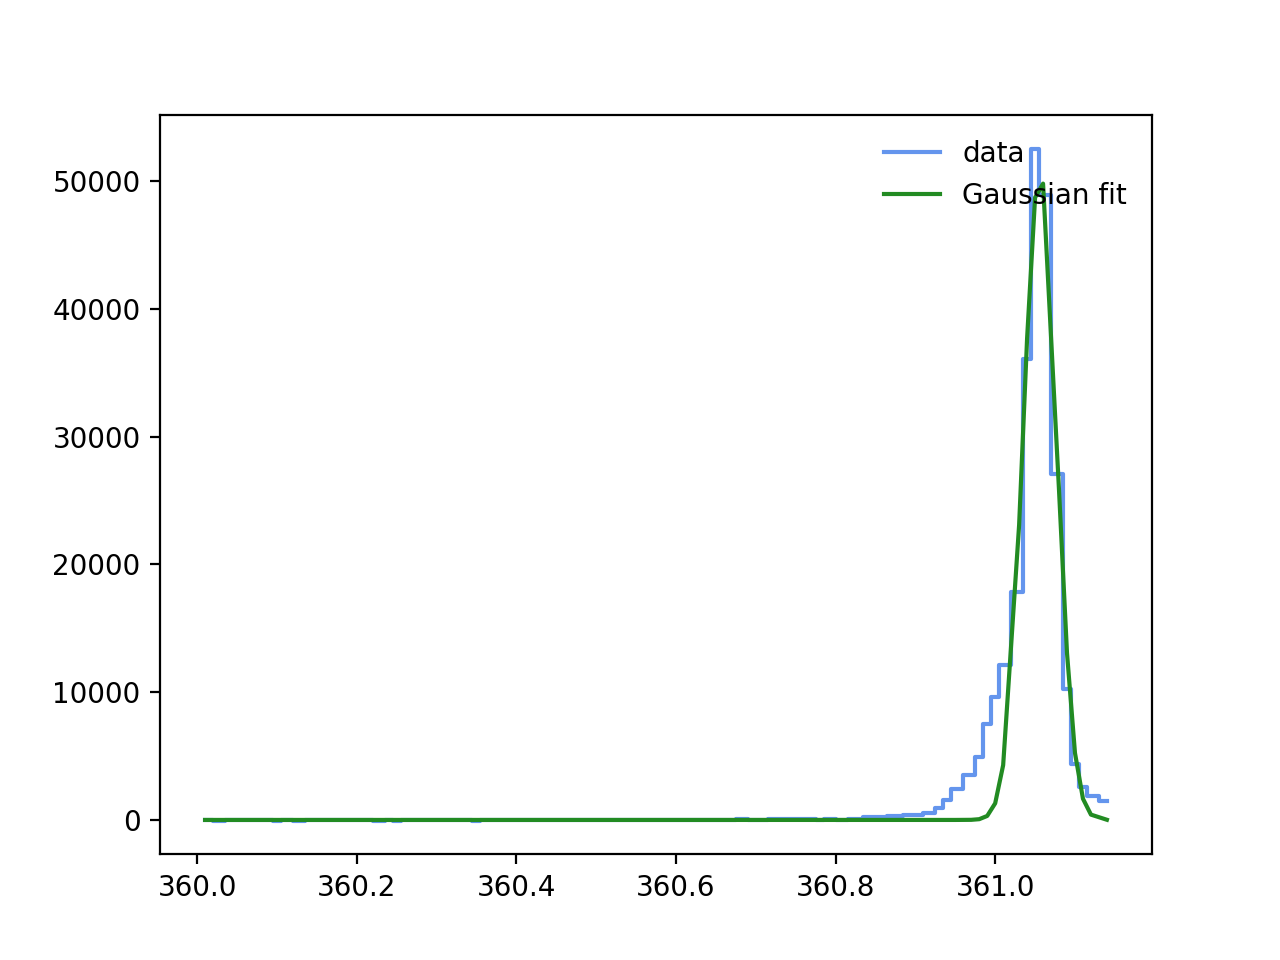

Estimated parameters:
 A = 50787.64198, mu = 361.05594,  sigma = 0.02067 

Uncertainties in the estimated parameters: 
 σ²(A) = 1638877.76580, σ²(mu) = 0.00000, σ²(sigma) = 0.00000 

Covariance matrix: 
 [[ 1.63887777e+06  1.82495299e-01 -4.33510480e-01]
 [ 1.82495299e-01  4.07377889e-07 -5.85263573e-08]
 [-4.33510480e-01 -5.85263573e-08  3.63470218e-07]]


<IPython.core.display.Javascript object>


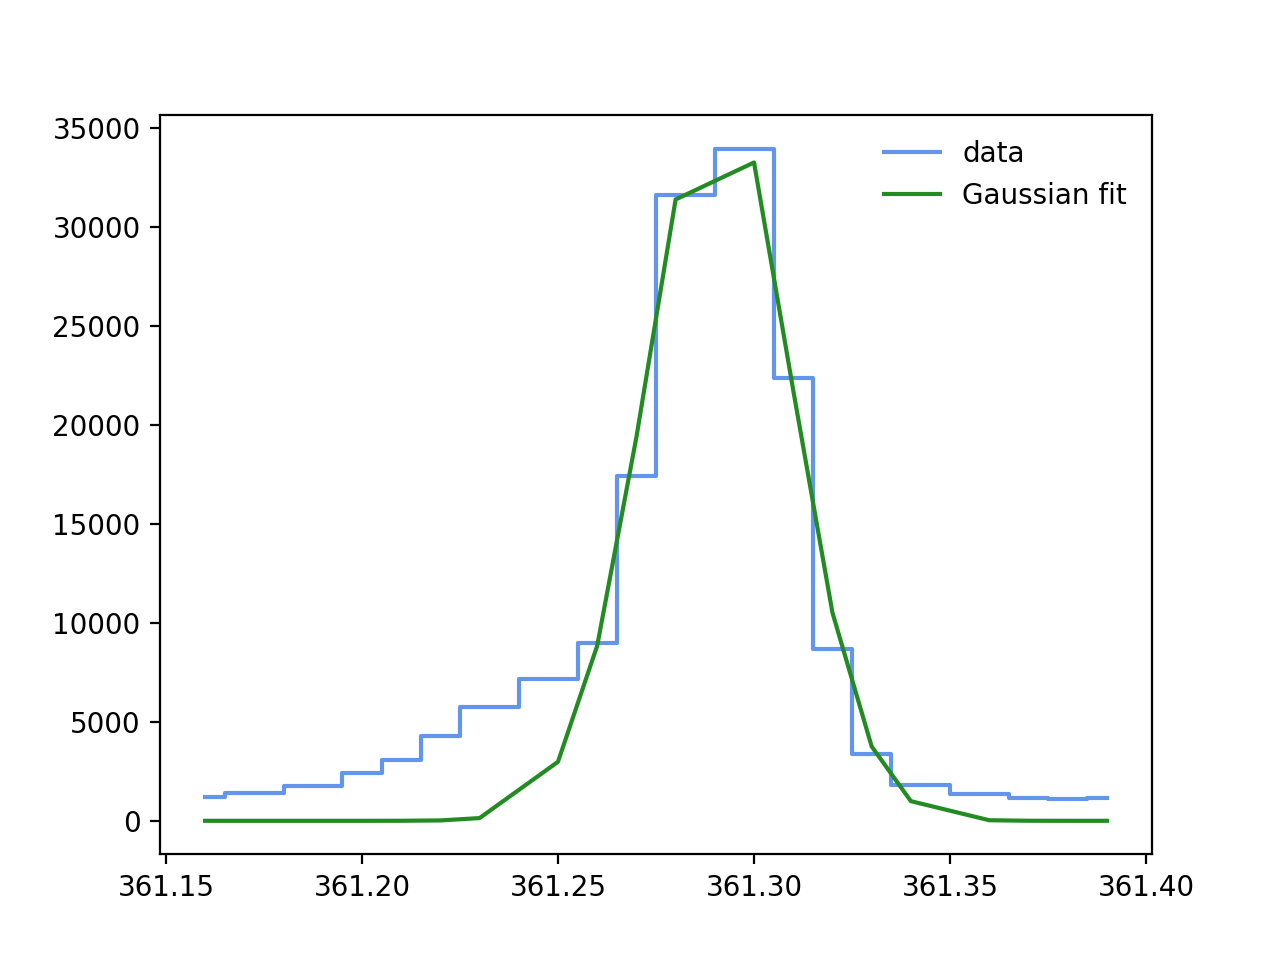

Estimated parameters:
 A = 37637.59589, mu = 361.29096,  sigma = 0.01819 

Uncertainties in the estimated parameters: 
 σ²(A) = 5334522.86308, σ²(mu) = 0.00000, σ²(sigma) = 0.00000 

Covariance matrix: 
 [[ 5.33452286e+06 -7.71704555e-02 -1.73093182e+00]
 [-7.71704555e-02  8.90057977e-07  2.20938027e-08]
 [-1.73093182e+00  2.20938027e-08  1.15868452e-06]]


<IPython.core.display.Javascript object>


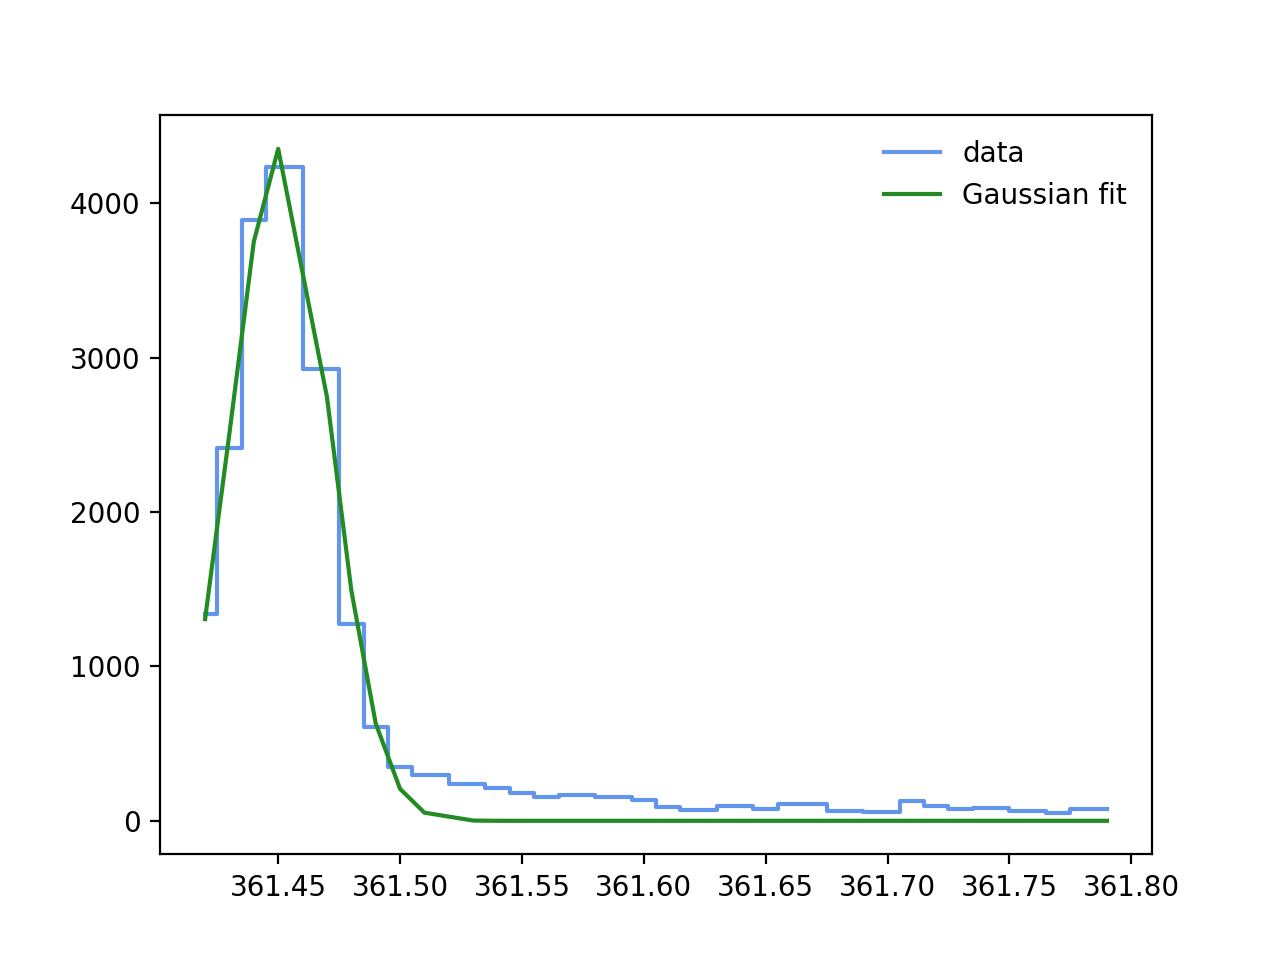

Estimated parameters:
 A = 4357.20555, mu = 361.45088,  sigma = 0.01989 

Uncertainties in the estimated parameters: 
 σ²(A) = 11903.35965, σ²(mu) = 0.00000, σ²(sigma) = 0.00000 

Covariance matrix: 
 [[1.19033596e+04 1.39000135e-02 3.67582959e-02]
 [1.39000135e-02 2.75319962e-07 5.15457969e-08]
 [3.67582959e-02 5.15457969e-08 2.86549854e-07]]


In [43]:
peak1 = fittingFunctions.perform_Gaussian_fit(x=wavelength, 
                                              y=counts,      
                                              region_start=340,   # bins where to start fitting
                                              region_stop=343,    # bins where to stop fitting
                                              mu_guess=341,       # guess for the position of peak centroid
                                              A_guess=40000,       # guess for the amplitude of the peak
                                              sigma_guess=1)      # guess for the sigma

peak1 = fittingFunctions.perform_Gaussian_fit(x=wavelength, 
                                              y=counts,      
                                              region_start=345,   # bins where to start fitting
                                              region_stop=346.7,    # bins where to stop fitting
                                              mu_guess=346,       # guess for the position of peak centroid
                                              A_guess=60000,       # guess for the amplitude of the peak
                                              sigma_guess=1)      # guess for the sigma

peak1 = fittingFunctions.perform_Gaussian_fit(x=wavelength, 
                                              y=counts,      
                                              region_start=346.7,   # bins where to start fitting
                                              region_stop=348,    # bins where to stop fitting
                                              mu_guess=347,       # guess for the position of peak centroid
                                              A_guess=60000,       # guess for the amplitude of the peak
                                              sigma_guess=1)      # guess for the sigma

peak1 = fittingFunctions.perform_Gaussian_fit(x=wavelength, 
                                              y=counts,      
                                              region_start=349,   # bins where to start fitting
                                              region_stop=351,    # bins where to stop fitting
                                              mu_guess=350,       # guess for the position of peak centroid
                                              A_guess=600,       # guess for the amplitude of the peak
                                              sigma_guess=1)      # guess for the sigma

peak1 = fittingFunctions.perform_Gaussian_fit(x=wavelength, 
                                              y=counts,      
                                              region_start=355,   # bins where to start fitting
                                              region_stop=357,    # bins where to stop fitting
                                              mu_guess=356,       # guess for the position of peak centroid
                                              A_guess=300,       # guess for the amplitude of the peak
                                              sigma_guess=1)      # guess for the sigma

peak1 = fittingFunctions.perform_Gaussian_fit(x=wavelength, 
                                              y=counts,      
                                              region_start=360,   # bins where to start fitting
                                              region_stop=361.15,    # bins where to stop fitting
                                              mu_guess=361,       # guess for the position of peak centroid
                                              A_guess=50000,       # guess for the amplitude of the peak
                                              sigma_guess=1)      # guess for the sigma

peak1 = fittingFunctions.perform_Gaussian_fit(x=wavelength, 
                                              y=counts,      
                                              region_start=361.15,   # bins where to start fitting
                                              region_stop=361.4,    # bins where to stop fitting
                                              mu_guess=361.3,       # guess for the position of peak centroid
                                              A_guess=30000,       # guess for the amplitude of the peak
                                              sigma_guess=1)      # guess for the sigma

peak1 = fittingFunctions.perform_Gaussian_fit(x=wavelength, 
                                              y=counts,      
                                              region_start=361.4,   # bins where to start fitting
                                              region_stop=361.8,    # bins where to stop fitting
                                              mu_guess=361.5,       # guess for the position of peak centroid
                                              A_guess=5000,       # guess for the amplitude of the peak
                                              sigma_guess=1)      # guess for the sigma